# 2016 U.S. Presidential Election Clusterability Analysis


**Names**: Linfeng Wang

**NetID**: linfeng7

## 1. Introduction and Dataset Research

Voting in the U.S. always bring nation-wide attention, even world-wide. I remembered in 2016 when I was about to came to the U.S. for high school, I watched 2016 presidential debate, Trump vs. Clinton with my friend and it was indeed very interesting. The two political parties in the U.S.: Democrat and Republican have really distinct ideologies that are performed in many way. Tax, for example, Democrat party claim to minimum wages and progressive taxation, while republican party believe tax shouldn’t be increased for anyone. I remembered when I took high school in Broward county in Florida, the food in the restaurant was taxed at a rate of 7%. However, now in the Champaign, Illinois, the food tax rise to 11%. I think this might be result from different political preference about taxation of the two counties.

The data contained in the election.csv file contains the results of voting for each candidate and their political perference of all counties as well as their state location in the US in 2016. There's a question always concerned me that is: Is people in each counties vote because of a specific candidate or based on their political perference? 

**Therefore, in this case study, we want to find that if there exists a clear pattern in the way counties vote for different political parties.**


In this dataset, the percentage means Democrat candidates only compete with other Democrats in each county to win the Democrat party presidential nomination. And Republicans candidates only compete with other republicans in each county to win the Republican party presidential nomination. Therefore, the percentage should add up to 200% since there's two parties. However, to satistify my reasearch goal, the percentage should add up to 100% since I want to see the pattern of percentage of vote of each different candidate of each county. I will explain more at data manipulation part.  






Abadi, Mark. “Even the US Government Can't Agree on How to Divide up the States into Regions.” Business Insider, Business Insider, www.businessinsider.com/regions-of-united-states-2018-5. 


“Religious Landscape Study.” Pew Research Center's Religion &amp; Public Life Project, Pew Research Center, 13 June 2022, www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/region/. 


Whitcomb, Ryan. “Political News, Analysis and Opinion | CNN Politics.” CNN, Cable News Network, www.cnn.com/election/primaries/counties/va/Dem. 

## 2. Data Cleaning and Data Manipulation

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from pyclustertend import hopkins
from sklearn.manifold import TSNE
from sklearn_extra.cluster import KMedoids


from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.cm as cm
from skfuzzy.cluster import cmeans


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [20]:
df_full = pd.read_csv("election.csv")
df_full.head()   #full dataset

Location_County  Location_State Location_State_Abbreviation  \
0       Abbeville  South Carolina                          SC   
1           Abbot           Maine                          ME   
2        Abington   Massachusetts                          MA   
3          Acadia       Louisiana                          LA   
4        Accomack        Virginia                          VA   

   Vote_Data_Ben_Carson_Number_of_Votes Vote_Data_Ben_Carson_Party  \
0                                   305                 Republican   
1                                     0                 Republican   
2                                    53                 Republican   
3                                     0                 Republican   
4                                   411                 Republican   

   Vote_Data_Ben_Carson_Percent_of_Votes  \
0                                    8.3   
1                                    0.0   
2                                    2.5   
3                                    0.0   
4                                    9.5   

   Vote_Data_Bernie_Sanders_Number_of_Votes Vote_Data_Bernie_Sanders_Party  \
0                                       312                       Democrat   
1                                         1                       Democrat   
2                                      1352                       Democrat   
3                                      1087                       Democrat   
4                                       682                       Democrat   

   Vote_Data_Bernie_Sanders_Percent_of_Votes  \
0                                       17.0   
1                                      100.0   
2                                       53.4   
3                                       31.4   
4                                       27.4   

   Vote_Data_Carly_Fiorina_Number_of_Votes  ...  \
0                                        0  ...   
1                                        0  ...   
2                                        0  ...   
3                                        0  ...   
4                                        0  ...   

  Vote_Data_Rand_Paul_Percent_of_Votes  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   Vote_Data_Rick_Santorum_Number_of_Votes  Vote_Data_Rick_Santorum_Party  \
0                                        0                     Republican   
1                                        0                     Republican   
2                                        0                     Republican   
3                                        0                     Republican   
4                                        0                     Republican   

  Vote_Data_Rick_Santorum_Percent_of_Votes  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Vote_Data_Ted_Cruz_Number_of_Votes  Vote_Data_Ted_Cruz_Party  \
0                                 876                Republican   
1                                   0                Republican   
2                                 208                Republican   
3                                1454                Republican   
4                                 685                Republican   

  Vote_Data_Ted_Cruz_Percent_of_Votes  Vote_Data_Uncommitted_Number_of_Votes  \
0                                23.9                                      0   
1                                 0.0                                      0   
2                                 9.9                                      0   
3                                38.2                                      0   
4                                15.9                           

In [21]:
df_full.shape

(4216, 51)

In [22]:
df_numerical = df_full._get_numeric_data().drop(['Vote_Data_Uncommitted_Party'], axis=1)
df_numerical = df_numerical.drop(['Vote_Data_No_Preference_Party'], axis=1)
df_numerical  #Combined dataset before dropped 

Vote_Data_Ben_Carson_Number_of_Votes  \
0                                      305   
1                                        0   
2                                       53   
3                                        0   
4                                      411   
...                                    ...   
4211                                     0   
4212                                     0   
4213                                     4   
4214                                     0   
4215                                     0   

      Vote_Data_Ben_Carson_Percent_of_Votes  \
0                                       8.3   
1                                       0.0   
2                                       2.5   
3                                       0.0   
4                                       9.5   
...                                     ...   
4211                                    0.0   
4212                                    0.0   
4213                                    4.7   
4214                                    0.0   
4215                                    0.0   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                          312   
1                                            1   
2                                         1352   
3                                         1087   
4                                          682   
...                                        ...   
4211                                      2156   
4212                                        33   
4213                                       685   
4214                                       373   
4215                                       132   

      Vote_Data_Bernie_Sanders_Percent_of_Votes  \
0                                          17.0   
1                                         100.0   
2                                          53.4   
3                                          31.4   
4                                          27.4   
...                                         ...   
4211                                       31.5   
4212                                       39.3   
4213                                       23.6   
4214                                       18.1   
4215                                       58.9   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
4211                                        0   
4212                                        0   
4213                                        0   
4214                                        0   
4215                                        0   

      Vote_Data_Carly_Fiorina_Percent_of_Votes  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
4211                                       0.0   
4212                                       0.0   
4213                                       0.0   
4214                                       0.0   
4215                                       0.0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
4211                                         0   
4212                                         0   
4213                              

### Data Cleaning: 

Next, we want to construct a dataframe with only total number of votes. So that we can drop the counties that have fewer votes. Say drop the counties that have less than 1000 votes. 

In [23]:
n = df_numerical.shape[1]
df_total = df_numerical.copy()
for i in np.arange(1, n, 2):
    df_total = df_total.drop(df_numerical.columns[i], axis=1)
    
df_total  # All total votes dataset

Vote_Data_Ben_Carson_Number_of_Votes  \
0                                      305   
1                                        0   
2                                       53   
3                                        0   
4                                      411   
...                                    ...   
4211                                     0   
4212                                     0   
4213                                     4   
4214                                     0   
4215                                     0   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                          312   
1                                            1   
2                                         1352   
3                                         1087   
4                                          682   
...                                        ...   
4211                                      2156   
4212                                        33   
4213                                       685   
4214                                       373   
4215                                       132   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
4211                                        0   
4212                                        0   
4213                                        0   
4214                                        0   
4215                                        0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
4211                                         0   
4212                                         0   
4213                                         0   
4214                                         0   
4215                                         0   

      Vote_Data_Donald_Trump_Number_of_Votes  \
0                                       1353   
1                                          0   
2                                       1222   
3                                       1694   
4                                       2068   
...                                      ...   
4211                                    4390   
4212                                       0   
4213                                      34   
4214                                       0   
4215                                      79   

      Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                          1501   
1                                             0   
2                                          1129   
3                                          1862   
4                                          1789   
...                                         ...   
4211                                       4358   
4212                                         45   
4213                                       1969   
4214                                       1557   
4215                                         92   

      Vote_Data_Jeb_Bush_Number_of_Votes  \
0                                    236   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
4211                                   0   
4212                                   0   
4213                                   0   
4214                            

In [24]:
df_total.sum(axis = 1)

0        5480
1           1
2        4560
3        6629
4        6750
        ...  
4211    13982
4212       78
4213     2735
4214     1930
4215      339
Length: 4216, dtype: int64

In [25]:

drop_value = (df_total.sum(axis = 1) < 1000)

df_droped = df_numerical.drop(index=df_total.index[drop_value], axis=0)
df_droped = df_droped.reset_index(drop=True)

df_droped  #dropped combined dataset

Vote_Data_Ben_Carson_Number_of_Votes  \
0                                      305   
1                                       53   
2                                        0   
3                                      411   
4                                       54   
...                                    ...   
2967                                   210   
2968                                     0   
2969                                     0   
2970                                     4   
2971                                     0   

      Vote_Data_Ben_Carson_Percent_of_Votes  \
0                                       8.3   
1                                       2.5   
2                                       0.0   
3                                       9.5   
4                                       2.3   
...                                     ...   
2967                                    5.0   
2968                                    0.0   
2969                                    0.0   
2970                                    4.7   
2971                                    0.0   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                          312   
1                                         1352   
2                                         1087   
3                                          682   
4                                         2557   
...                                        ...   
2967                                       131   
2968                                      1730   
2969                                      2156   
2970                                       685   
2971                                       373   

      Vote_Data_Bernie_Sanders_Percent_of_Votes  \
0                                          17.0   
1                                          53.4   
2                                          31.4   
3                                          27.4   
4                                          46.8   
...                                         ...   
2967                                       38.8   
2968                                       51.1   
2969                                       31.5   
2970                                       23.6   
2971                                       18.1   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
2967                                        0   
2968                                        0   
2969                                        0   
2970                                        0   
2971                                        0   

      Vote_Data_Carly_Fiorina_Percent_of_Votes  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
2967                                       0.0   
2968                                       0.0   
2969                                       0.0   
2970                                       0.0   
2971                                       0.0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
2967                                         0   
2968                                         0   
2969                              


Therefore, according to the criteria, we should drop the total number of votes that are less than 1000 votes for a particular county. After data cleaning, Our final model have 2972 rows. 


### Data Manipulation: 
In this dataset, the percentage means Democrat candidates only compete with other Democrats in each county to win the Democrat party presidential nomination. And Republicans candidates only compete with other republicans in each county to win the Republican party presidential nomination. However, it would be more interesting to find the dominant group in each county and connection based on their geographical region. 


In [26]:
drop_value = (df_total.sum(axis = 1) < 1000)

df_all = df_full.drop(index=df_total.index[drop_value], axis=0)
df_all = df_all.reset_index(drop=True)


df_all  #dropped full dataset

Location_County  Location_State Location_State_Abbreviation  \
0          Abbeville  South Carolina                          SC   
1           Abington   Massachusetts                          MA   
2             Acadia       Louisiana                          LA   
3           Accomack        Virginia                          VA   
4              Acton   Massachusetts                          MA   
...              ...             ...                         ...   
2967           Young           Texas                          TX   
2968            Yuba      California                          CA   
2969            Yuma         Arizona                          AZ   
2970          Zapata           Texas                          TX   
2971          Zavala           Texas                          TX   

      Vote_Data_Ben_Carson_Number_of_Votes Vote_Data_Ben_Carson_Party  \
0                                      305                 Republican   
1                                       53                 Republican   
2                                        0                 Republican   
3                                      411                 Republican   
4                                       54                 Republican   
...                                    ...                        ...   
2967                                   210                 Republican   
2968                                     0                 Republican   
2969                                     0                 Republican   
2970                                     4                 Republican   
2971                                     0                 Republican   

      Vote_Data_Ben_Carson_Percent_of_Votes  \
0                                       8.3   
1                                       2.5   
2                                       0.0   
3                                       9.5   
4                                       2.3   
...                                     ...   
2967                                    5.0   
2968                                    0.0   
2969                                    0.0   
2970                                    4.7   
2971                                    0.0   

      Vote_Data_Bernie_Sanders_Number_of_Votes Vote_Data_Bernie_Sanders_Party  \
0                                          312                       Democrat   
1                                         1352                       Democrat   
2                                         1087                       Democrat   
3                                          682                       Democrat   
4                                         2557                       Democrat   
...                                        ...                            ...   
2967                                       131                       Democrat   
2968                                      1730                       Democrat   
2969                                      2156                       Democrat   
2970                                       685                       Democrat   
2971                                       373                       Democrat   

      Vote_Data_Bernie_Sanders_Percent_of_Votes  \
0                                          17.0   
1                                          53.4   
2                                          31.4   
3                                          27.4   
4                                          46.8   
...                                         ...   
2967                                       38.8   
2968                                       51.1   
2969                                       31.5   
2970                                       23.6   
2971                                       18.1   

      Vote_Data_Carly_Fiorina_Number_of_Votes  ...  \
0                                           0  ...   
1                                           0  ...  

In [27]:
m = df_droped.shape[1]
df2 = df_droped.copy()
for i in np.arange(1, m, 2):
    df2 = df2.drop(df_droped.columns[i], axis=1)
    
df2 = df2.dropna() #All true vote dataset



#Since we only consider Republican voter vs. Democrat voter, therefore, drop the Uncommitted and no preference voters
df2 = df2.drop(['Vote_Data_Uncommitted_Number_of_Votes'],  axis=1)
df2 = df2.drop(['Vote_Data_No_Preference_Number_of_Votes'],  axis=1)
df2

Vote_Data_Ben_Carson_Number_of_Votes  \
0                                      305   
1                                       53   
2                                        0   
3                                      411   
4                                       54   
...                                    ...   
2967                                   210   
2968                                     0   
2969                                     0   
2970                                     4   
2971                                     0   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                          312   
1                                         1352   
2                                         1087   
3                                          682   
4                                         2557   
...                                        ...   
2967                                       131   
2968                                      1730   
2969                                      2156   
2970                                       685   
2971                                       373   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
2967                                        0   
2968                                        0   
2969                                        0   
2970                                        0   
2971                                        0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
2967                                         0   
2968                                         0   
2969                                         0   
2970                                         0   
2971                                         0   

      Vote_Data_Donald_Trump_Number_of_Votes  \
0                                       1353   
1                                       1222   
2                                       1694   
3                                       2068   
4                                        656   
...                                      ...   
2967                                    1254   
2968                                    3210   
2969                                    4390   
2970                                      34   
2971                                       0   

      Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                          1501   
1                                          1129   
2                                          1862   
3                                          1789   
4                                          2884   
...                                         ...   
2967                                        198   
2968                                       1572   
2969                                       4358   
2970                                       1969   
2971                                       1557   

      Vote_Data_Jeb_Bush_Number_of_Votes  \
0                                    236   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
2967                                   0   
2968                                   0   
2969                                   0   
2970                            

We want to find out the percentage of a particular candidate's weight compare to all other candidates in a specific county. This can be done by dividing row sum for each entry.

In [28]:
df_scaled = df2.div(df2.sum(axis=1), axis=0)
df_scaled

Vote_Data_Ben_Carson_Number_of_Votes  \
0                                 0.055657   
1                                 0.011700   
2                                 0.000000   
3                                 0.060889   
4                                 0.007026   
...                                    ...   
2967                              0.048011   
2968                              0.000000   
2969                              0.000000   
2970                              0.001463   
2971                              0.000000   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                     0.056934   
1                                     0.298455   
2                                     0.163976   
3                                     0.101037   
4                                     0.332683   
...                                        ...   
2967                                  0.029950   
2968                                  0.246158   
2969                                  0.154198   
2970                                  0.250457   
2971                                  0.193264   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
2967                                      0.0   
2968                                      0.0   
2969                                      0.0   
2970                                      0.0   
2971                                      0.0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
2967                                       0.0   
2968                                       0.0   
2969                                       0.0   
2970                                       0.0   
2971                                       0.0   

      Vote_Data_Donald_Trump_Number_of_Votes  \
0                                   0.246898   
1                                   0.269757   
2                                   0.255544   
3                                   0.306370   
4                                   0.085350   
...                                      ...   
2967                                0.286694   
2968                                0.456744   
2969                                0.313975   
2970                                0.012431   
2971                                0.000000   

      Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                      0.273905   
1                                      0.249227   
2                                      0.280887   
3                                      0.265037   
4                                      0.375228   
...                                         ...   
2967                                   0.045267   
2968                                   0.223677   
2969                                   0.311686   
2970                                   0.719927   
2971                                   0.806736   

      Vote_Data_Jeb_Bush_Number_of_Votes  \
0                               0.043066   
1                               0.000000   
2                               0.000000   
3                               0.000000   
4                               0.000000   
...                                  ...   
2967                            0.000000   
2968                            0.000000   
2969                            0.000000   
2970                            

Next, we want to consider the percentage of vote of Republican candidates and democrat candidates for each county, here is the list the all Republican and Democrate candidates:

Republican = {"Ted_Cruz", "Ben Carson", "Carly Fiorina", "Chris Christie", "Donald Trump", "Jeb Bush", "John Kasich", "Marco Rubio",  "Mike Huckabee", Rand Paul, Rick Santorum }

Democrat = {"Bernie Sanders", "Hillary Clinton", "Martin O'Malley" }

In [29]:
df_scaled.columns

Index(['Vote_Data_Ben_Carson_Number_of_Votes',
       'Vote_Data_Bernie_Sanders_Number_of_Votes',
       'Vote_Data_Carly_Fiorina_Number_of_Votes',
       'Vote_Data_Chris_Christie_Number_of_Votes',
       'Vote_Data_Donald_Trump_Number_of_Votes',
       'Vote_Data_Hillary_Clinton_Number_of_Votes',
       'Vote_Data_Jeb_Bush_Number_of_Votes',
       'Vote_Data_John_Kasich_Number_of_Votes',
       'Vote_Data_Marco_Rubio_Number_of_Votes',
       'Vote_Data_Martin_OMalley_Number_of_Votes',
       'Vote_Data_Mike_Huckabee_Number_of_Votes',
       'Vote_Data_Rand_Paul_Number_of_Votes',
       'Vote_Data_Rick_Santorum_Number_of_Votes',
       'Vote_Data_Ted_Cruz_Number_of_Votes'],
      dtype='object')

In [30]:
democrate_total = df_scaled['Vote_Data_Bernie_Sanders_Number_of_Votes'] + df_scaled['Vote_Data_Hillary_Clinton_Number_of_Votes'] + df_scaled['Vote_Data_Martin_OMalley_Number_of_Votes']

democrate_total


0       0.330839
1       0.547682
2       0.444863
3       0.366074
4       0.707910
          ...   
2967    0.075217
2968    0.469835
2969    0.465885
2970    0.970384
2971    1.000000
Length: 2972, dtype: float64

In [31]:
republican_total = 1 - democrate_total
republican_total

0       0.669161
1       0.452318
2       0.555137
3       0.633926
4       0.292090
          ...   
2967    0.924783
2968    0.530165
2969    0.534115
2970    0.029616
2971    0.000000
Length: 2972, dtype: float64

In [32]:
df_scaled['political_preference'] = np.where(democrate_total > 0.5, 'Democrat', 'Republican')
df_scaled

Vote_Data_Ben_Carson_Number_of_Votes  \
0                                 0.055657   
1                                 0.011700   
2                                 0.000000   
3                                 0.060889   
4                                 0.007026   
...                                    ...   
2967                              0.048011   
2968                              0.000000   
2969                              0.000000   
2970                              0.001463   
2971                              0.000000   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                     0.056934   
1                                     0.298455   
2                                     0.163976   
3                                     0.101037   
4                                     0.332683   
...                                        ...   
2967                                  0.029950   
2968                                  0.246158   
2969                                  0.154198   
2970                                  0.250457   
2971                                  0.193264   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
2967                                      0.0   
2968                                      0.0   
2969                                      0.0   
2970                                      0.0   
2971                                      0.0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
2967                                       0.0   
2968                                       0.0   
2969                                       0.0   
2970                                       0.0   
2971                                       0.0   

      Vote_Data_Donald_Trump_Number_of_Votes  \
0                                   0.246898   
1                                   0.269757   
2                                   0.255544   
3                                   0.306370   
4                                   0.085350   
...                                      ...   
2967                                0.286694   
2968                                0.456744   
2969                                0.313975   
2970                                0.012431   
2971                                0.000000   

      Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                      0.273905   
1                                      0.249227   
2                                      0.280887   
3                                      0.265037   
4                                      0.375228   
...                                         ...   
2967                                   0.045267   
2968                                   0.223677   
2969                                   0.311686   
2970                                   0.719927   
2971                                   0.806736   

      Vote_Data_Jeb_Bush_Number_of_Votes  \
0                               0.043066   
1                               0.000000   
2                               0.000000   
3                               0.000000   
4                               0.000000   
...                                  ...   
2967                            0.000000   
2968                            0.000000   
2969                            0.000000   
2970                            

Converting all States based on their geographical regions. According to The US Census Bureau, which considers there to be four regions of the US: the Northeast, the Midwest, the South, and the West.

In [33]:
dic = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

df2["state"] = df_all["Location_State"]

df_scaled['region'] = df2['state'].map(dic)


df_scaled #This is the final dataset that we will be using in our clustering analysis, 
        #with pre-assigned label "political preference"
    
    


Vote_Data_Ben_Carson_Number_of_Votes  \
0                                 0.055657   
1                                 0.011700   
2                                 0.000000   
3                                 0.060889   
4                                 0.007026   
...                                    ...   
2967                              0.048011   
2968                              0.000000   
2969                              0.000000   
2970                              0.001463   
2971                              0.000000   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                     0.056934   
1                                     0.298455   
2                                     0.163976   
3                                     0.101037   
4                                     0.332683   
...                                        ...   
2967                                  0.029950   
2968                                  0.246158   
2969                                  0.154198   
2970                                  0.250457   
2971                                  0.193264   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
2967                                      0.0   
2968                                      0.0   
2969                                      0.0   
2970                                      0.0   
2971                                      0.0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
2967                                       0.0   
2968                                       0.0   
2969                                       0.0   
2970                                       0.0   
2971                                       0.0   

      Vote_Data_Donald_Trump_Number_of_Votes  \
0                                   0.246898   
1                                   0.269757   
2                                   0.255544   
3                                   0.306370   
4                                   0.085350   
...                                      ...   
2967                                0.286694   
2968                                0.456744   
2969                                0.313975   
2970                                0.012431   
2971                                0.000000   

      Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                      0.273905   
1                                      0.249227   
2                                      0.280887   
3                                      0.265037   
4                                      0.375228   
...                                         ...   
2967                                   0.045267   
2968                                   0.223677   
2969                                   0.311686   
2970                                   0.719927   
2971                                   0.806736   

      Vote_Data_Jeb_Bush_Number_of_Votes  \
0                               0.043066   
1                               0.000000   
2                               0.000000   
3                               0.000000   
4                               0.000000   
...                                  ...   
2967                            0.000000   
2968                            0.000000   
2969                            0.000000   
2970                            

In [34]:
df = df_scaled.copy()
df = df.drop(['political_preference'], axis = 1)
df = df.drop(['region'], axis = 1)
df #This final dataframe only contains percentage of each candicate in each county in the US

Vote_Data_Ben_Carson_Number_of_Votes  \
0                                 0.055657   
1                                 0.011700   
2                                 0.000000   
3                                 0.060889   
4                                 0.007026   
...                                    ...   
2967                              0.048011   
2968                              0.000000   
2969                              0.000000   
2970                              0.001463   
2971                              0.000000   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                     0.056934   
1                                     0.298455   
2                                     0.163976   
3                                     0.101037   
4                                     0.332683   
...                                        ...   
2967                                  0.029950   
2968                                  0.246158   
2969                                  0.154198   
2970                                  0.250457   
2971                                  0.193264   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
2967                                      0.0   
2968                                      0.0   
2969                                      0.0   
2970                                      0.0   
2971                                      0.0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
2967                                       0.0   
2968                                       0.0   
2969                                       0.0   
2970                                       0.0   
2971                                       0.0   

      Vote_Data_Donald_Trump_Number_of_Votes  \
0                                   0.246898   
1                                   0.269757   
2                                   0.255544   
3                                   0.306370   
4                                   0.085350   
...                                      ...   
2967                                0.286694   
2968                                0.456744   
2969                                0.313975   
2970                                0.012431   
2971                                0.000000   

      Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                      0.273905   
1                                      0.249227   
2                                      0.280887   
3                                      0.265037   
4                                      0.375228   
...                                         ...   
2967                                   0.045267   
2968                                   0.223677   
2969                                   0.311686   
2970                                   0.719927   
2971                                   0.806736   

      Vote_Data_Jeb_Bush_Number_of_Votes  \
0                               0.043066   
1                               0.000000   
2                               0.000000   
3                               0.000000   
4                               0.000000   
...                                  ...   
2967                            0.000000   
2968                            0.000000   
2969                            0.000000   
2970                            

## 3. Basic Descriptive Analytics

Next, let's find out basic summary statistics about each numerical attribute.

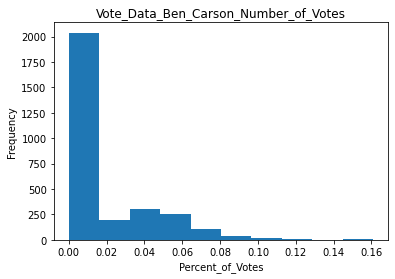

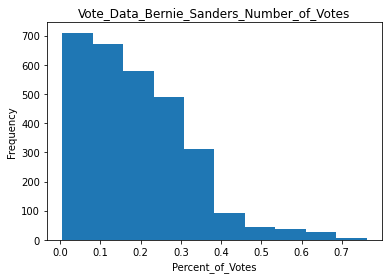

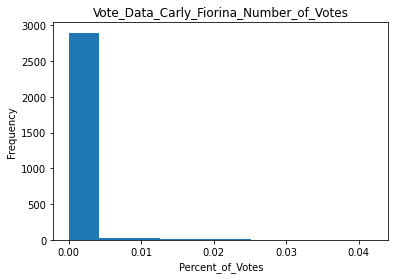

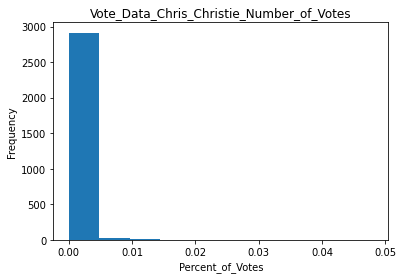

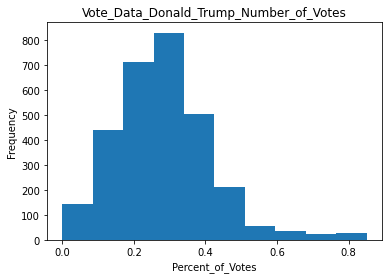

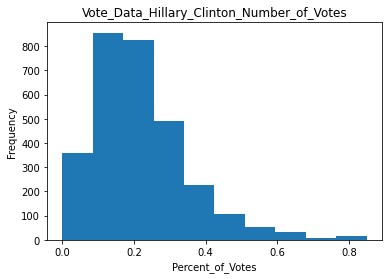

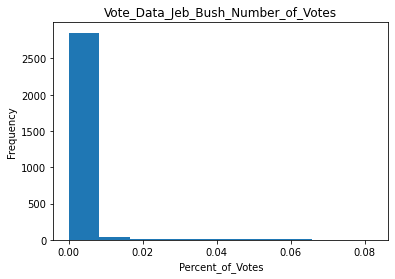

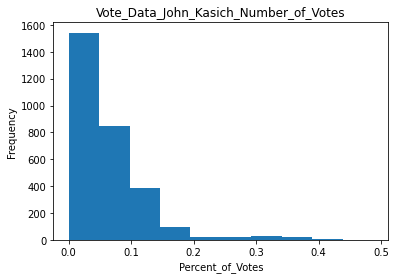

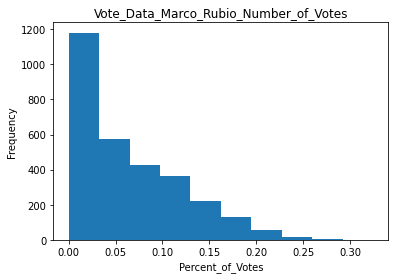

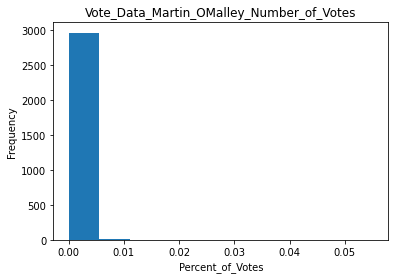

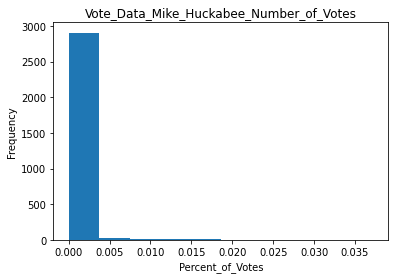

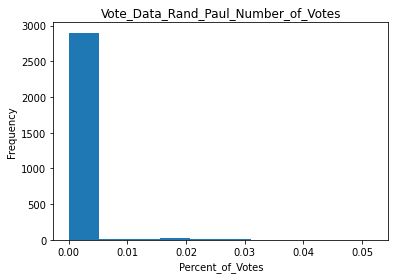

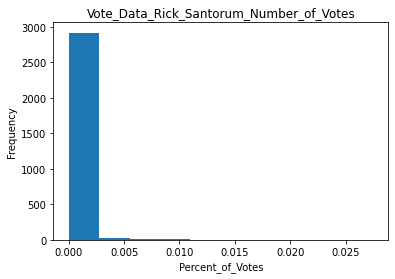

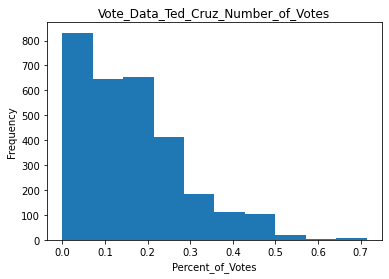

In [35]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel('Percent_of_Votes')
    plt.ylabel('Frequency')
    plt.show()

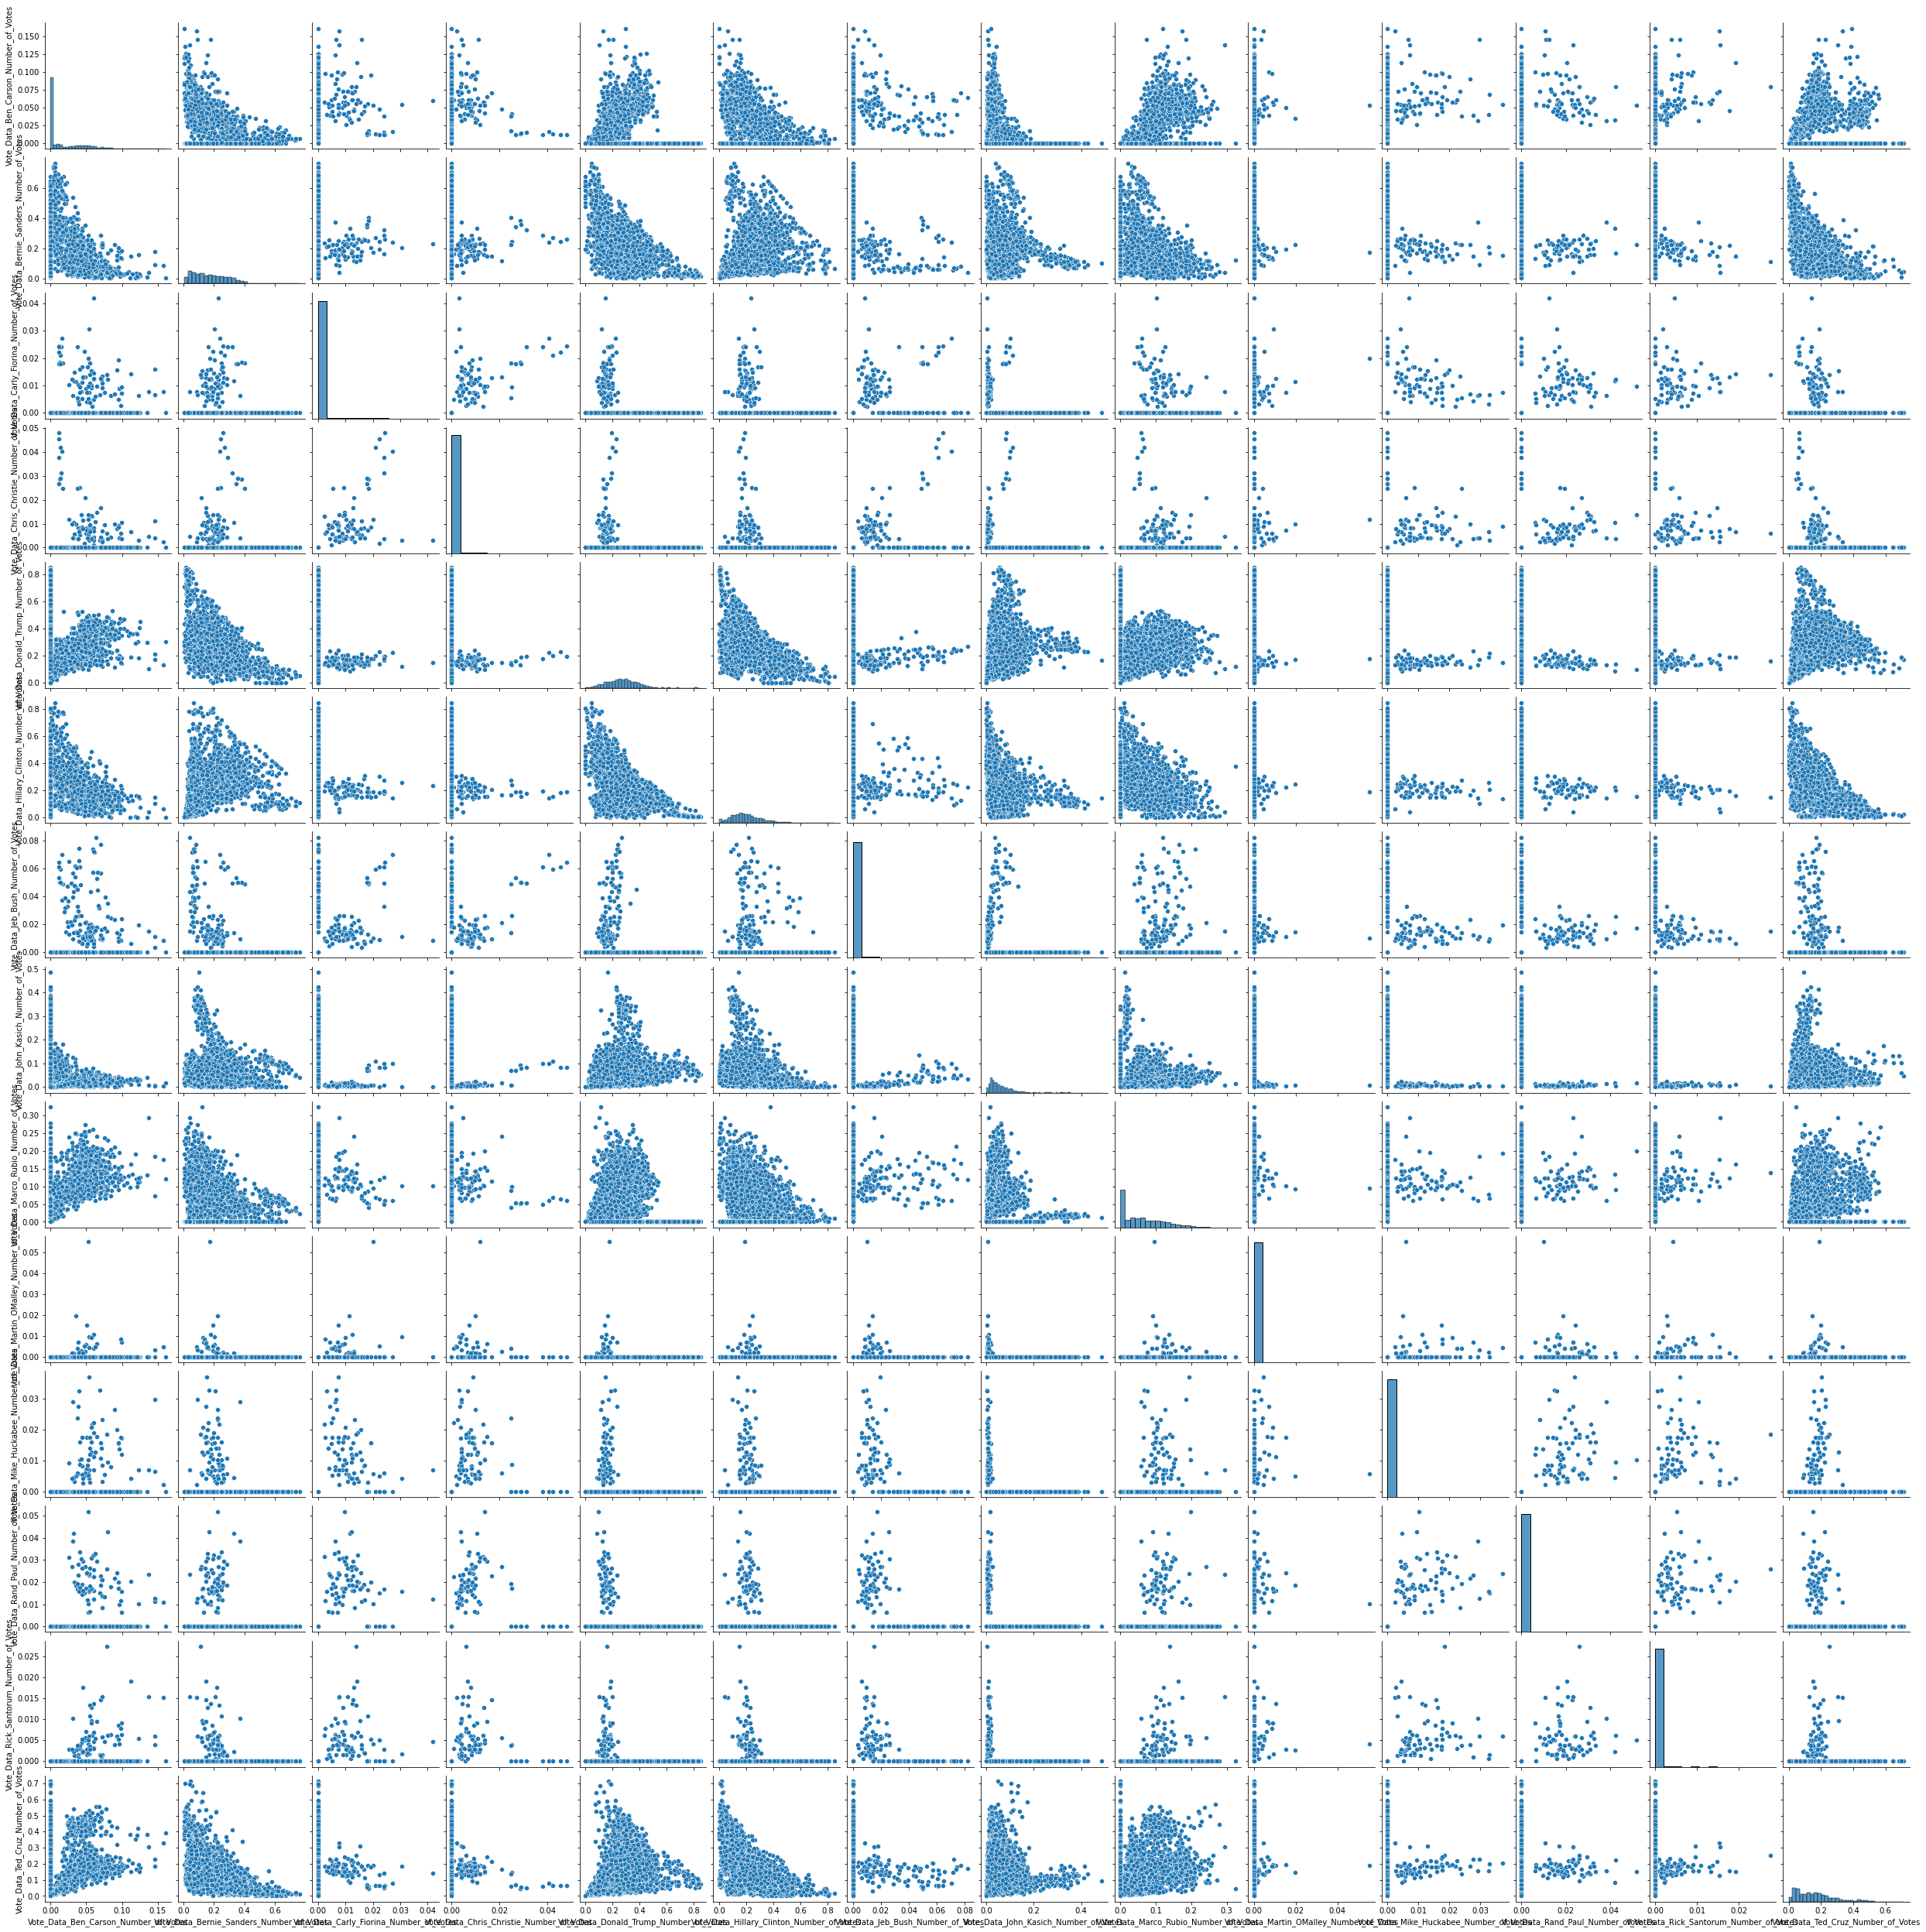

In [36]:
sns.pairplot( df )
plt.show()


From the pairplot, we can find most of the scatterplot between two variable are in a cloud-shape, which means there might be potential subgroups or clustering structures in the data. 

In [37]:
df.describe()

Vote_Data_Ben_Carson_Number_of_Votes  \
count                           2972.000000   
mean                               0.016548   
std                                0.025465   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.031756   
max                                0.160898   

       Vote_Data_Bernie_Sanders_Number_of_Votes  \
count                               2972.000000   
mean                                   0.190416   
std                                    0.130058   
min                                    0.005376   
25%                                    0.084501   
50%                                    0.168855   
75%                                    0.274053   
max                                    0.761892   

       Vote_Data_Carly_Fiorina_Number_of_Votes  \
count                              2972.000000   
mean                                  0.000343   
std                                   0.002340   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   0.041991   

       Vote_Data_Chris_Christie_Number_of_Votes  \
count                               2972.000000   
mean                                   0.000309   
std                                    0.002526   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    0.048051   

       Vote_Data_Donald_Trump_Number_of_Votes  \
count                             2972.000000   
mean                                 0.283502   
std                                  0.134549   
min                                  0.000000   
25%                                  0.194886   
50%                                  0.274593   
75%                                  0.356611   
max                                  0.850358   

       Vote_Data_Hillary_Clinton_Number_of_Votes  \
count                                2972.000000   
mean                                    0.218337   
std                                     0.133248   
min                                     0.000000   
25%                                     0.126948   
50%                                     0.195735   
75%                                     0.281963   
max                                     0.849452   

       Vote_Data_Jeb_Bush_Number_of_Votes  \
count                         2972.000000   
mean                             0.001226   
std                              0.007190   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.000000   
max                              0.082221   

       Vote_Data_John_Kasich_Number_of_Votes  \
count                            2972.000000   
mean                                0.063382   
std                                 0.059179   
min                                 0.000000   
25%                                 0.024788   
50%                                 0.046917   
75%                                 0.084051   
max                                 0.486825   

       Vote_Data_Marco_Rubio_Number_of_Votes  \
count                            2972.000000   
mean                                0.061144   
std                                 0.059363   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.048925   
75%                                 0.101995   
max                                 0.324442   

       Vote_Data_Martin_OMall

In [38]:
df_scaled['region'].value_counts()

South        1304
Midwest       689
Northeast     683
West          296
Name: region, dtype: int64

In [39]:
df_scaled['political_preference'].value_counts()

Republican    1968
Democrat      1004
Name: political_preference, dtype: int64

## 4. Dataset Scaling Decisions

We decides to **scale our dataset.**

I did this part in part 2: data manipulation. Where I rescaled the dataset so that all entrie are divided by their row sum. So that all entries in a row are added up to 100%. Thus, the large numerical value will not be a problem in this dataset since the entries are already normalized to a common scale. 

## 5. Clusterability and Clustering Structure Questions

### 1. By Hopkins statistics

In [40]:
X=df.copy()
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.06069911356494516, 0.055875898720729435, 0.060822125518032275, 0.06328959343232123, 0.05884207880461019]


**Conclusion Using Hopkins Statistics:** The dataset is clusterable because many of these Hopkins statistics are closer to 0 than they are to 0.5, the Hopkin's statistic suggests that the dataset is clusterable.

### 2. Try T-SNE

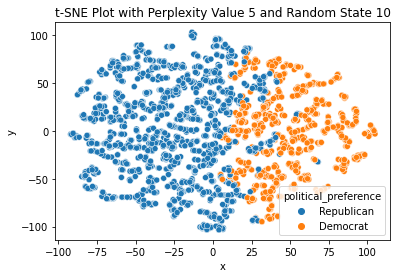

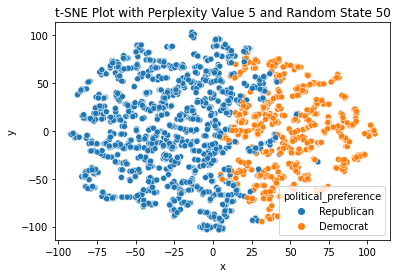

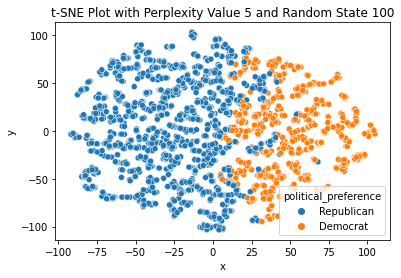

--------------------------------------------


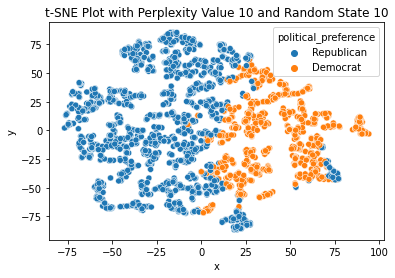

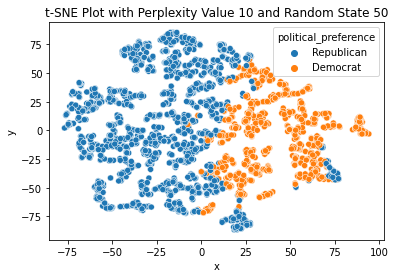

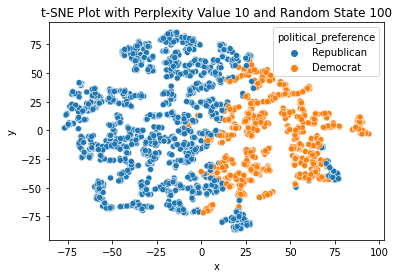

--------------------------------------------


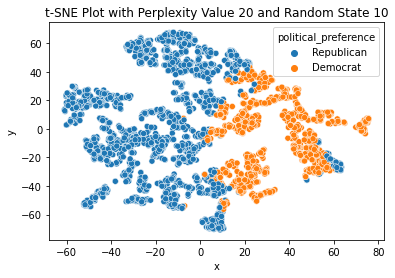

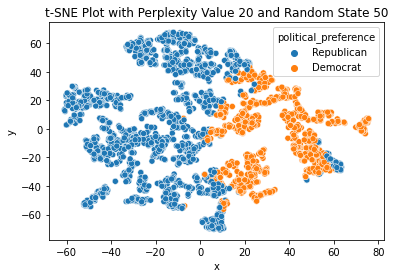

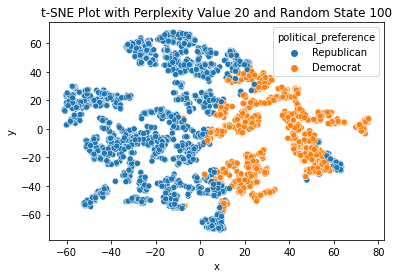

--------------------------------------------


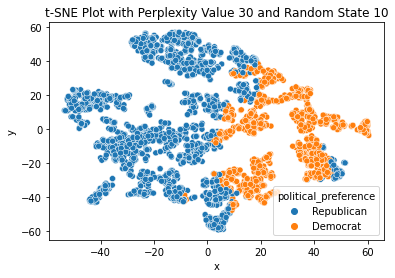

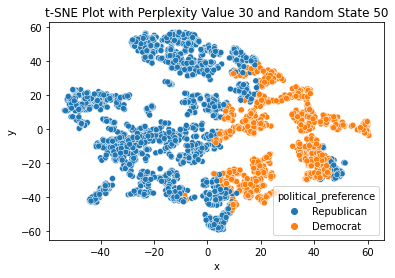

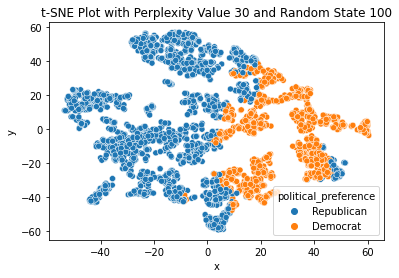

--------------------------------------------


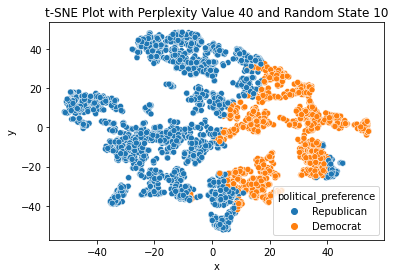

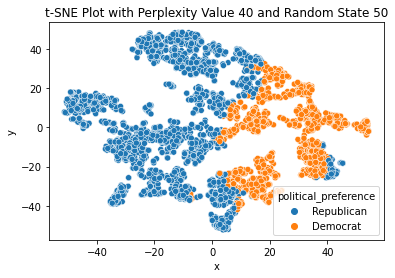

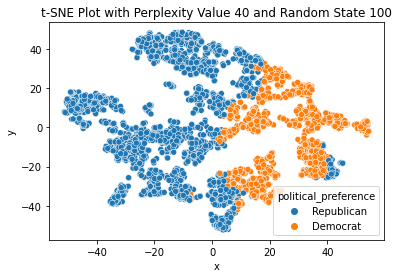

--------------------------------------------


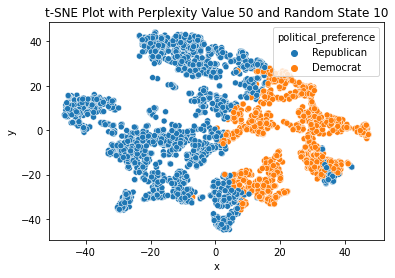

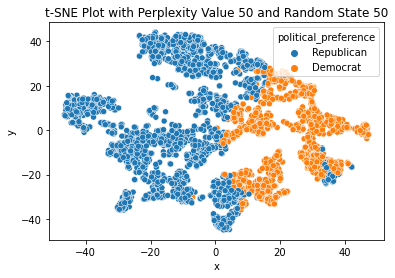

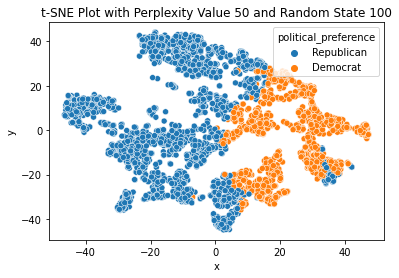

--------------------------------------------


In [41]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [10,50,100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform( df  )
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df_scaled, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', hue = "political_preference", data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

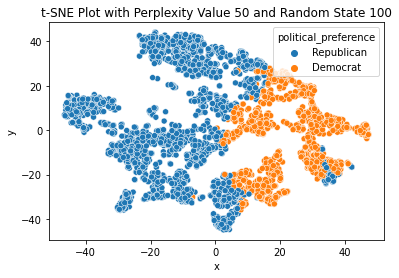

In [42]:
#pick one for visualization:

for perp in [50]:
    for rs in [100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform( df  )
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df_scaled, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', hue = "political_preference", data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()


In [43]:
#df_combo[df_combo["x"] >= 5 & df_combo["y"] >= 40 ]
#df_combo.loc[(df_combo['x'] <= 20) & (df_combo['y'] <= -40)  ]


**Conclusion Using TSNE:**

1. From the graph, we can conclude that there exist at least two distinct compact clusters. Therefore, the T-SNE algorithm suggest that this dataset is clusterable. 


2. This T-SNE plot with perplexity value 50 and random state 100 shows 6-7 distinct main clusters. This clustering also apply to most of other perplexity value and random state as well. These main cluster are mainly in spherical shape. They are not well balanced in size and are not well-saperated (As we can see some of objects are like "straddle nodes", that is: objects in this dataset that don't 100% belong to just one particular cluster). There are some overlapping clusters. Performing fuzzy c-mean clustering algorithm maybe a good choice dealing with overlapping clusters. 


## 6. Algorithm Selection Motivation

Since my dataset is about voting and there's two parties: Democrat and Republican. My first thought is performing k-mean algorithm.  Also, in section 5, by visualizing the dataset using plotting t-SNE algorithm, I found our dataset is clusterable which means this dataset is suitable by using k-mean clustering algorithm. From the scatter plot, Each cluster has about the same number of objects, and clusters are spherical and have the same sparsity. Also objects are not perfectly well seperated which might be a drawback of performing k-mean algorithm. We could give it a try. 

However, since some objects are not 100% belong to one particular cluster from TSNE plot. There are some overlapping clusters. To better detect these, performing fuzzy c-mean clustering algorithm will be a good choice.  

Therefore, My final choices are:

**1. K-mean Clustering algorithm**

**2. Fuzzy c-means Clustering algorithm**

## 7. K-mean Clustering Algorithm



### 7.1. Parameter Selection

In [45]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

avg_inertia_list=[]
for k in range(1,16):
   # print('-----------')
  #  print('Clusterings with k= '+str(k)+' Clusters')
    
    sub_inertia_list=[]
    for i in range(0,10):
        kmeans=KMeans(n_clusters=k).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
        #print('Inertia: '+str(kmeans.inertia_))
    avg_inertia_list.append(np.average(sub_inertia_list))
    #print('Average Inertia: '+str(np.average(sub_inertia_list)))

#avg_inertia_list

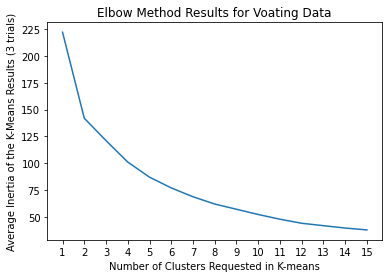

In [46]:
plt.plot(range(1,16),avg_inertia_list)
plt.xticks(np.arange(1, 16, 1.0))
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Voating Data')
plt.show()

**Parameter selection Using K-Mean**: There's a clear elbow shown on the graph, when k = 2. We decided to use k = 2 to perform k-mean algorithm.

### 7.2. Clustering Algorithm

In [47]:
kmeans=KMeans(n_clusters=2).fit(X)
X['predicted_cluster']=kmeans.labels_
X

Vote_Data_Ben_Carson_Number_of_Votes  \
0                                 0.055657   
1                                 0.011700   
2                                 0.000000   
3                                 0.060889   
4                                 0.007026   
...                                    ...   
2967                              0.048011   
2968                              0.000000   
2969                              0.000000   
2970                              0.001463   
2971                              0.000000   

      Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                     0.056934   
1                                     0.298455   
2                                     0.163976   
3                                     0.101037   
4                                     0.332683   
...                                        ...   
2967                                  0.029950   
2968                                  0.246158   
2969                                  0.154198   
2970                                  0.250457   
2971                                  0.193264   

      Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
2967                                      0.0   
2968                                      0.0   
2969                                      0.0   
2970                                      0.0   
2971                                      0.0   

      Vote_Data_Chris_Christie_Number_of_Votes  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
2967                                       0.0   
2968                                       0.0   
2969                                       0.0   
2970                                       0.0   
2971                                       0.0   

      Vote_Data_Donald_Trump_Number_of_Votes  \
0                                   0.246898   
1                                   0.269757   
2                                   0.255544   
3                                   0.306370   
4                                   0.085350   
...                                      ...   
2967                                0.286694   
2968                                0.456744   
2969                                0.313975   
2970                                0.012431   
2971                                0.000000   

      Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                      0.273905   
1                                      0.249227   
2                                      0.280887   
3                                      0.265037   
4                                      0.375228   
...                                         ...   
2967                                   0.045267   
2968                                   0.223677   
2969                                   0.311686   
2970                                   0.719927   
2971                                   0.806736   

      Vote_Data_Jeb_Bush_Number_of_Votes  \
0                               0.043066   
1                               0.000000   
2                               0.000000   
3                               0.000000   
4                               0.000000   
...                                  ...   
2967                            0.000000   
2968                            0.000000   
2969                            0.000000   
2970                            

### 7.3. Clustering Algorithm Results Presentation

Let's visualize the dataset that are clustered by k-mean algorithm on t-SNE plot and the correpsonding predicted clustering labels:

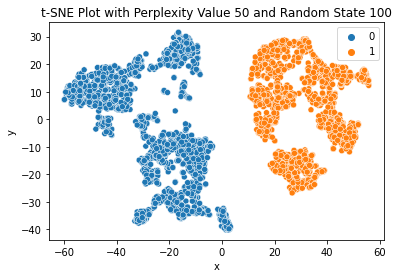

In [48]:
#Create the t-SNE plot projected coordinates
tsne = TSNE(n_components=2, perplexity=50, random_state=100, init='random')
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([X, df_tsne], axis=1)


sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 100))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### 7.4. Assessing Clustering Separation and Cohesion

NTF: For the clustering returned by your clustering algorithm create a silhouette plot and calculate the average silhouette score. Discuss the separation and cohesion of a.) each of the clusters and b.) the overall clustering. Are there are any objects that have poor cohesion with their assigned cluster? Explain.


In [49]:
def show_silhouette_plots(X,cluster_labels):

    # This package allows us to use "color maps" in our visualizations
    import matplotlib.cm as cm
    
    #How many clusters in your clustering?
    n_clusters=len(np.unique(cluster_labels))    

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient fcan range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
    

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()
    
    return

For n_clusters = 2 The average silhouette_score is : 0.7439125772431233


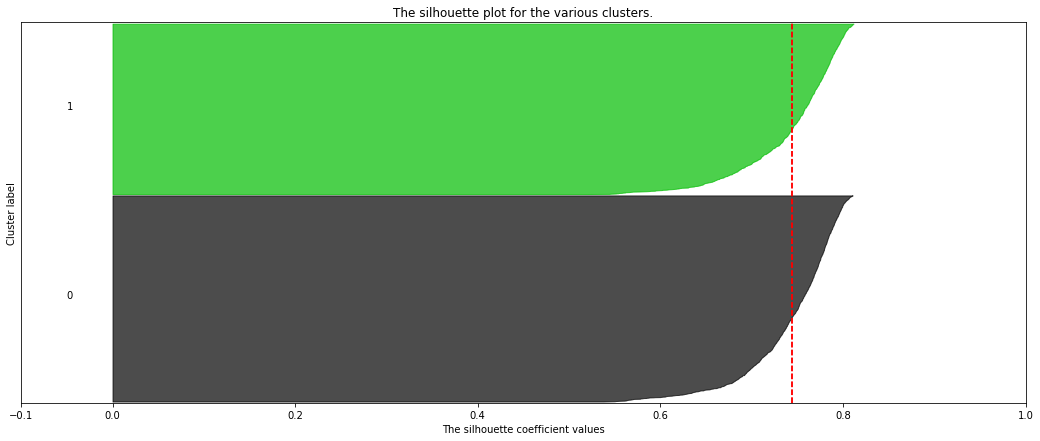

In [50]:
show_silhouette_plots(X, kmeans.labels_)

`Cluster 0 and 1 have about the same amount of cohesion and separation as their shapes are about the same. They also look like they have about the same number of objects assigned to the cluster. Also, clustering by k = 2 give us a relative high silhouette_score,  meaning the clusters are well seperated and cohesive.`


### 7.5. Additional Analysis

Since my dataset had pre-assigned class labels that I created, the political_preference. So it is a good way to present the similarity of pre-assigned class labels and predicted clustering labels. Therefore, I will do:

Calculate the following and interpret the result.

1. Adjusted RAND Index between the clustering and the class labels.

2. Homogeneity score between the clustering and the class labels.

3. Completeness score between the clustering and the class labels.

In [51]:
adjusted_rand_score(kmeans.labels_, df_scaled['political_preference'])

0.5932018729804943

`The adjusted RAND score of clustering labels and pre-assigned label is 0.59, showing that K-mean clustering had a relative strong association with political_preference. Since the rand score measure the similarity of partitions and k-means label yield a larger rand score when comparing to political_preference label.`

In [52]:
from sklearn.metrics import homogeneity_score

homogeneity_score(kmeans.labels_, df_scaled['political_preference'])

0.5566764609990338

`homogeneity_score is 0.55, about halfway between 0 and 1, which indicates that the cluster blur about homogenous with respect to the class labels or not.`


In [53]:
from sklearn.metrics import completeness_score


completeness_score(kmeans.labels_, df_scaled['political_preference'])

0.5993773914648891

`Completeness score is 0.599, which indicates that relatively most of political preference's label are evenly distributes amongst the clusters`


Next, we will color coding the points in the t-sne plot by cluster labels and class labels.

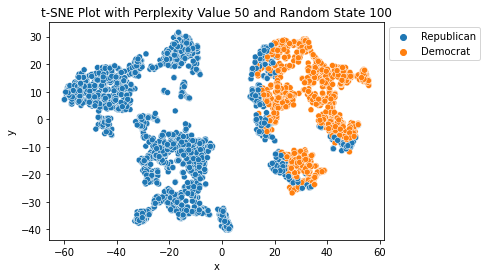

In [54]:
#By political preference

tsne = TSNE(n_components=2, perplexity=50, random_state=100, init='random')
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df_scaled, df_tsne], axis=1)


sns.scatterplot(x='x',y='y', hue='political_preference', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 100))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

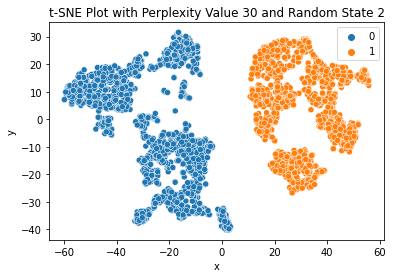

In [55]:
#By K-mean cluster labels
tsne = TSNE(n_components=2, perplexity=50, random_state=100, init='random')
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([X, df_tsne], axis=1)


sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 2))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Conclusion:** As the plots shows, it matches with my homogeneity score, and the completeness score since each of the k-means clusters are relatively homogenous with respect to the the class labels, however, a small portion of republican label goes beyond of its main clusters, indicating republican label is less completely together in a single cluster, resulting in lower the Completeness score. 

### 7.6. Describing Each of the Clusters

In [56]:
X.head()

Vote_Data_Ben_Carson_Number_of_Votes  \
0                              0.055657   
1                              0.011700   
2                              0.000000   
3                              0.060889   
4                              0.007026   

   Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                  0.056934   
1                                  0.298455   
2                                  0.163976   
3                                  0.101037   
4                                  0.332683   

   Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Vote_Data_Chris_Christie_Number_of_Votes  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Vote_Data_Donald_Trump_Number_of_Votes  \
0                                0.246898   
1                                0.269757   
2                                0.255544   
3                                0.306370   
4                                0.085350   

   Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                   0.273905   
1                                   0.249227   
2                                   0.280887   
3                                   0.265037   
4                                   0.375228   

   Vote_Data_Jeb_Bush_Number_of_Votes  Vote_Data_John_Kasich_Number_of_Votes  \
0                            0.043066                               0.028650   
1                            0.000000                               0.066004   
2                            0.000000                               0.019460   
3                            0.000000                               0.031111   
4                            0.000000                               0.098100   

   Vote_Data_Marco_Rubio_Number_of_Votes  \
0                               0.135036   
1                               0.058940   
2                               0.060793   
3                               0.134074   
4                               0.075202   

   Vote_Data_Martin_OMalley_Number_of_Votes  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Vote_Data_Mike_Huckabee_Number_of_Votes  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Vote_Data_Rand_Paul_Number_of_Votes  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   Vote_Data_Rick_Santorum_Number_of_Votes  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Vote_Data_Ted_Cruz_Number_of_Votes  predicted_cluster  
0                            0.159854                  0  
1                            0.045916                  1  
2                            0.219339                  0  
3                            0.101481                  0  
4                            0.026412                  1

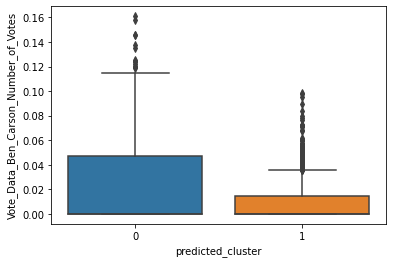

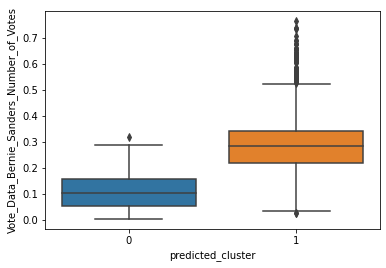

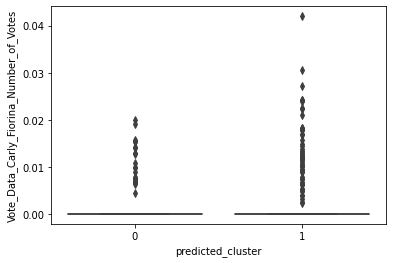

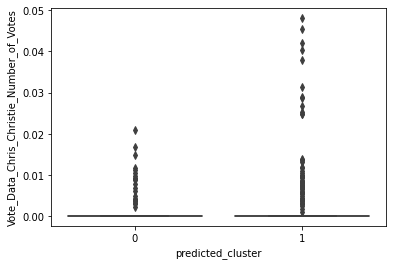

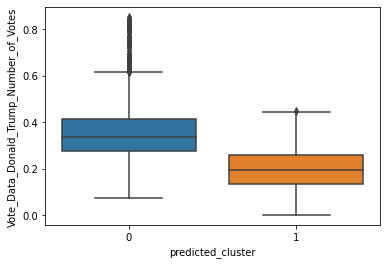

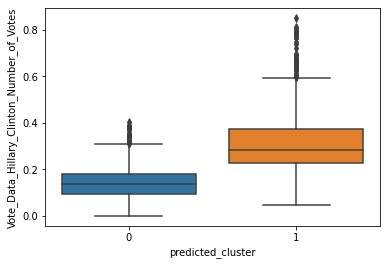

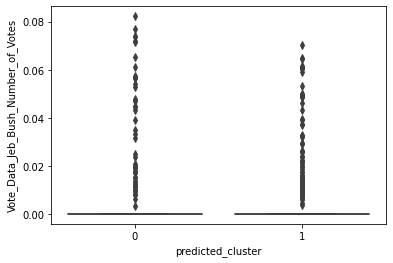

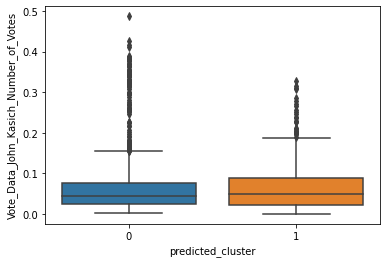

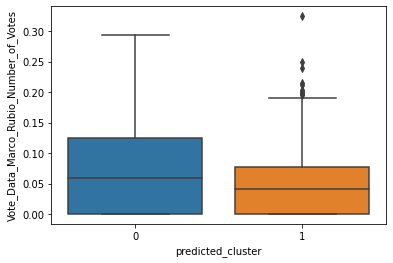

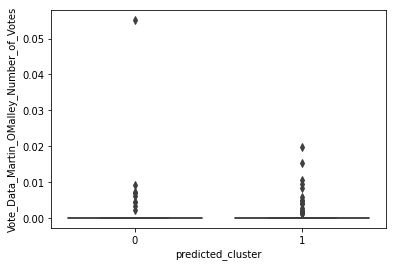

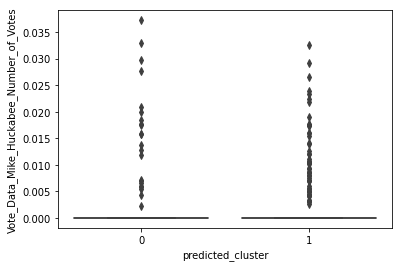

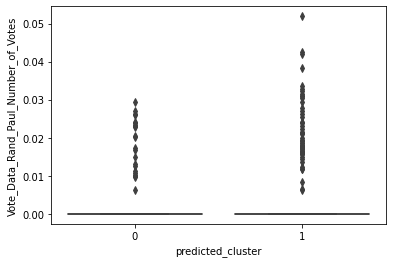

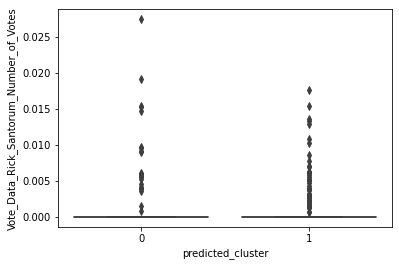

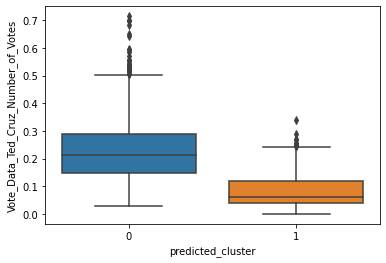

In [57]:
for col in X.columns[0:14]:
    sns.boxplot(x="predicted_cluster", y=col, data=X)
    plt.show()

**Conclusion:** From the box plot above, it give us a clear pattern of which candidate should belong to which clusters. 

Overall:

1. Cluster 0 prefer more to: Ben_carson, Donald_Trump, Marco_Rubio, Ted_Cruz

2. Cluster 1 prefer more to: Bernie_Sanders, Hillary_Clinton

3. Swing Candidate: John_Kasich is prefered by both clusters. 

#### Moreover, since we used k-mean algorithm, which is a prototyped based clustering algorithm, we could find tbe distance between centroids to find the similarity of two clusters: 

In [58]:
centroids = kmeans.cluster_centers_

distances = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        distances[i,j] = np.linalg.norm(centroids[i] - centroids[j], 2)

print("Distances between centroids:")
print(distances)

Distances between centroids:
[[0.         0.33001407]
 [0.33001407 0.        ]]


`The distances between centroids are 0.33, a large enough distance for percentage dataset, we could say that the clusters are quite distinct from each other.`


## 8. Fuzzy C-means Clustering Algorithm

Next, perform Fuzzy c-means to cluster this dataset.


### 8.1. Parameter Selection

We need to find a weighted inertia that best fit this model, as well as determine how many clusterings **fuzzy c-means** is detecting, based on different fuzziness parameter values p.

1. Let's try Fuzzy c-Means Elbow Plots with multiple p value to select the number of cluster c.

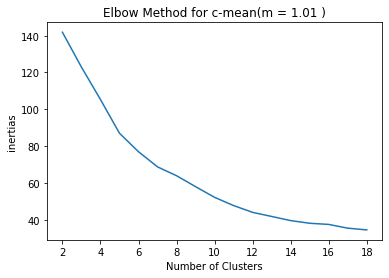

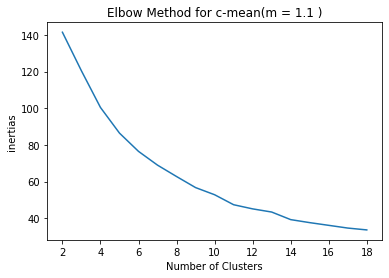

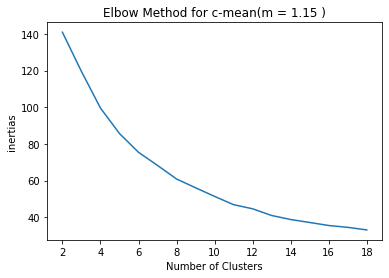

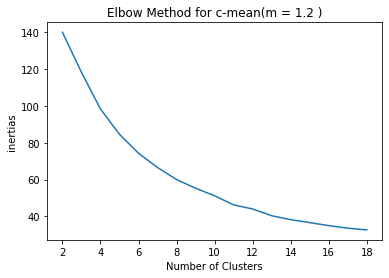

In [59]:
c_range = list(range(2,19))

inertias = np.zeros(len(c_range))

for p in [1.01, 1.1, 1.15, 1.2]:
    for i, c in enumerate(c_range):
        
        centroids, W, W_0, dist_mat, history, iters, ndpc =cmeans(df.T, c=c, m=p, error=1e-6, maxiter=20000, seed=100)
    
        inertias[i] = history[-1]
    
    
    
    plt.plot(c_range,inertias)
    plt.xlabel('Number of Clusters')
    plt.ylabel('inertias') 
    plt.title('Elbow Method for c-mean(m = %s )'%(p) )
    plt.show()


From the c-mean elbow plot,  when for multiple p choice, the Fuzzy c-Means Elbow Plots has subtle elbow shifts from c = 5, especially for p = 1.01; therefore, we decide to use **c = 5** number of clusters. 

2. Next, choose **p** for fuzzy c-means

In [60]:
df_combo["region"] = df_scaled['region']


------------------------------------------
Analysis for c=5 and p=1.01
Normalized Dunning Partitional Coefficient:  0.996241985096751
Final Objective Function Value:  86.97708343780906


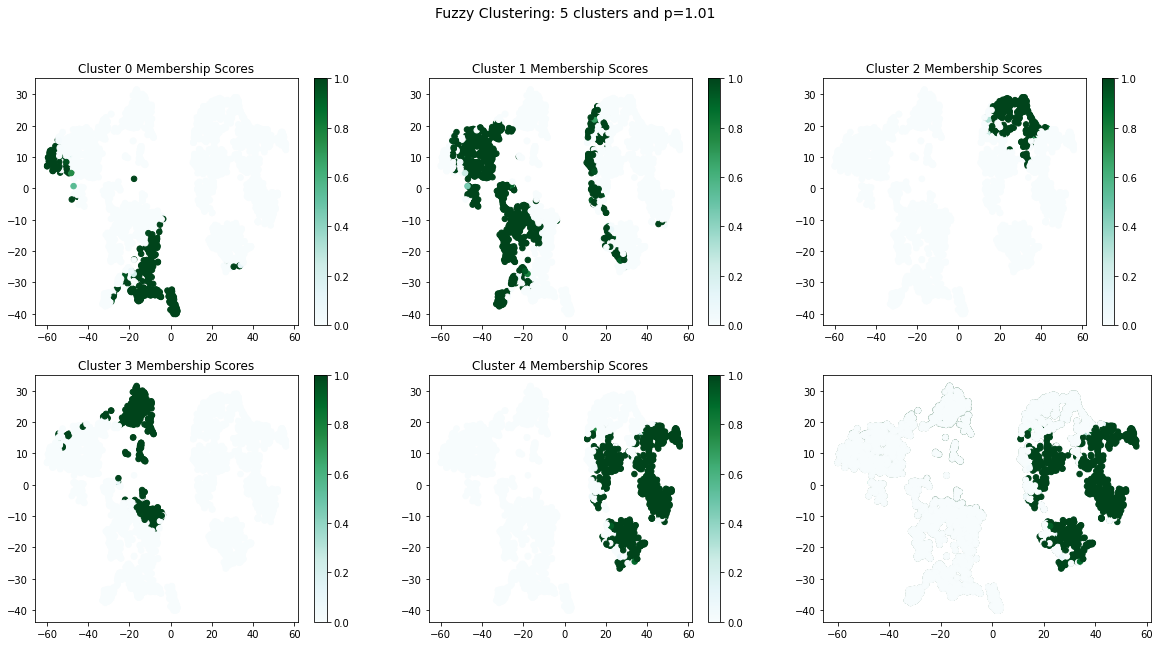

------------------------------------------
Analysis for c=5 and p=1.208
Normalized Dunning Partitional Coefficient:  0.8705528665973127
Final Objective Function Value:  84.369807739207


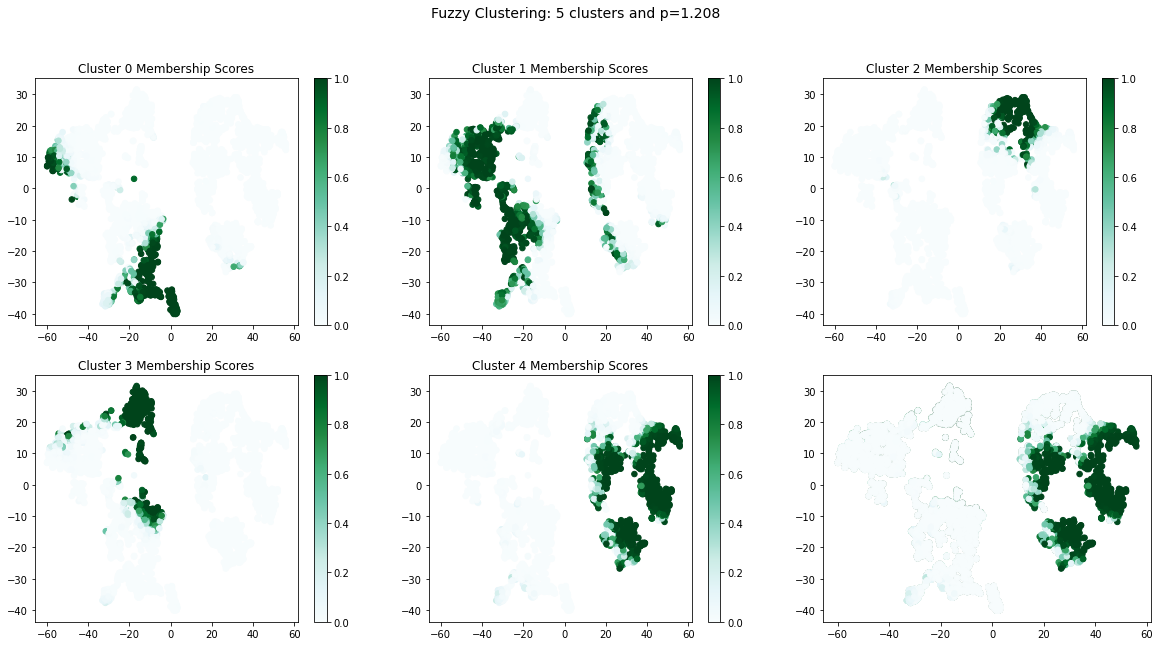

------------------------------------------
Analysis for c=5 and p=1.4060000000000001
Normalized Dunning Partitional Coefficient:  0.7137275716477314
Final Objective Function Value:  76.4008496367222


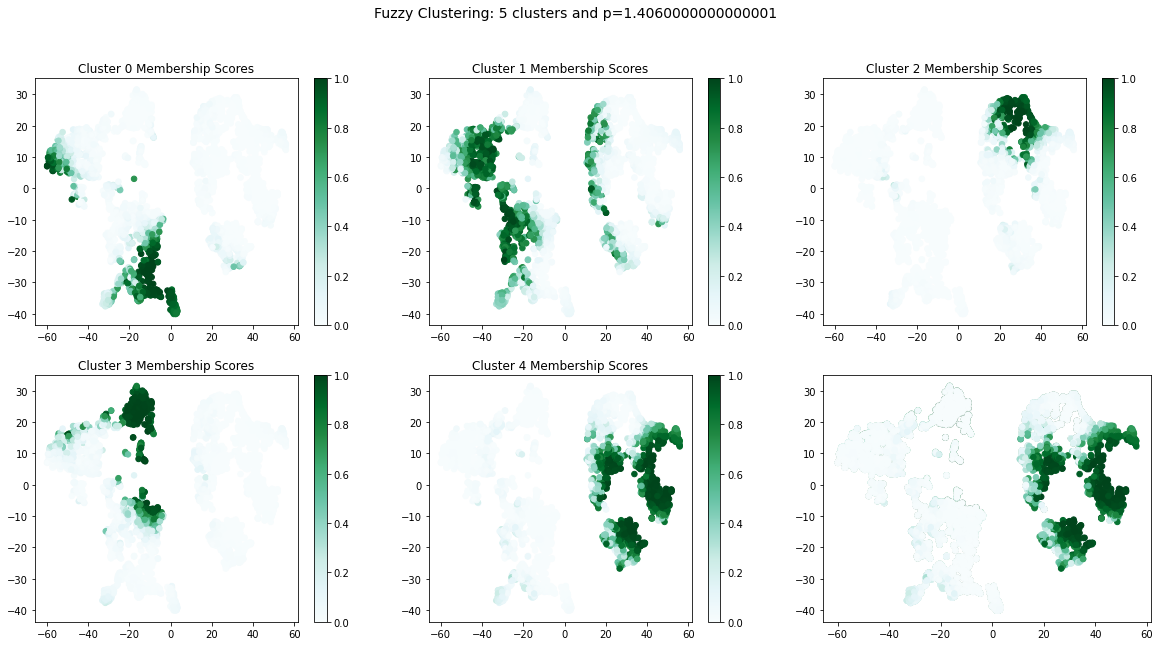

------------------------------------------
Analysis for c=5 and p=1.604
Normalized Dunning Partitional Coefficient:  0.5533155933155885
Final Objective Function Value:  64.39112628923613


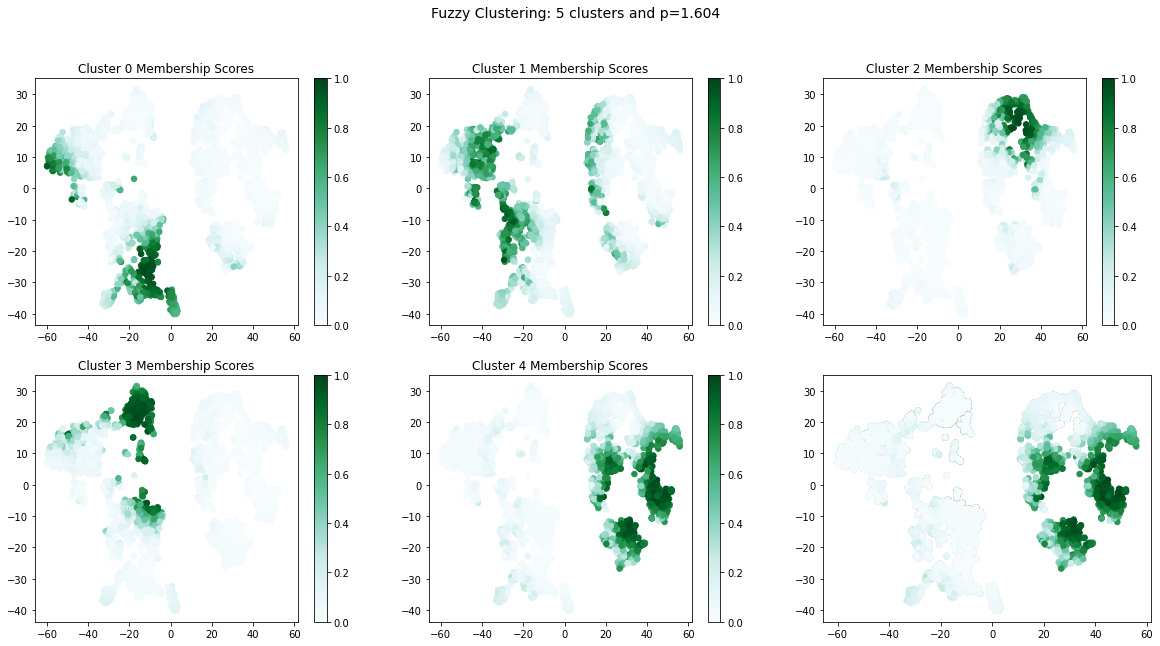

------------------------------------------
Analysis for c=5 and p=1.802
Normalized Dunning Partitional Coefficient:  0.4232839984074971
Final Objective Function Value:  51.20417198076806


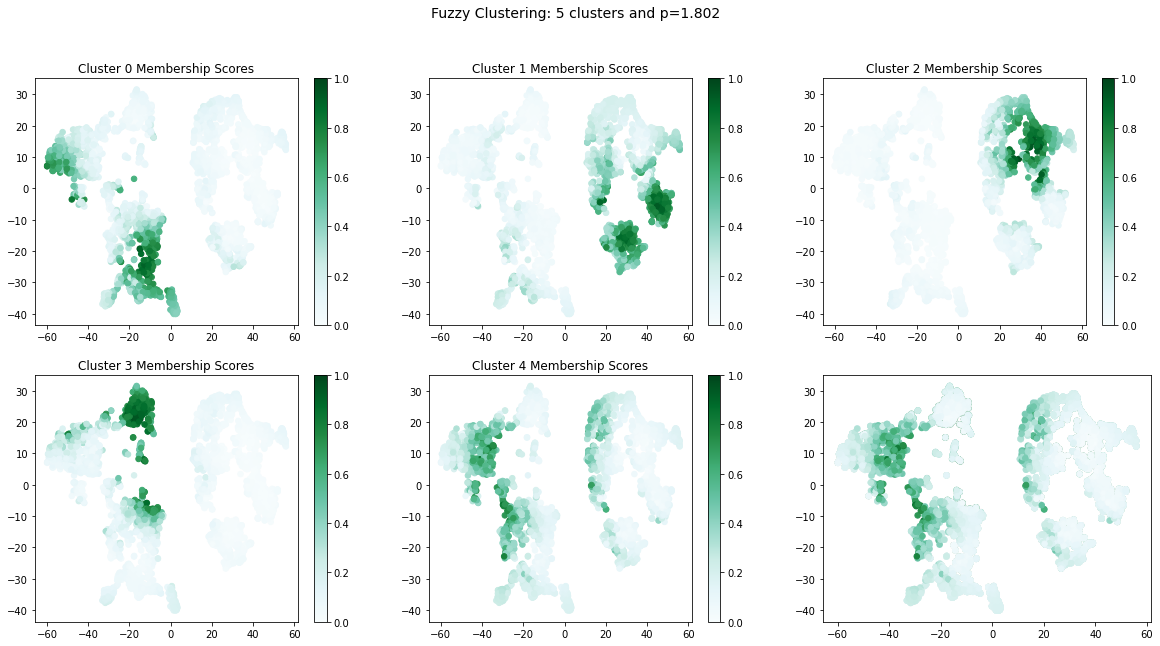

------------------------------------------
Analysis for c=5 and p=2.0
Normalized Dunning Partitional Coefficient:  0.34089967681509387
Final Objective Function Value:  39.30662648510892


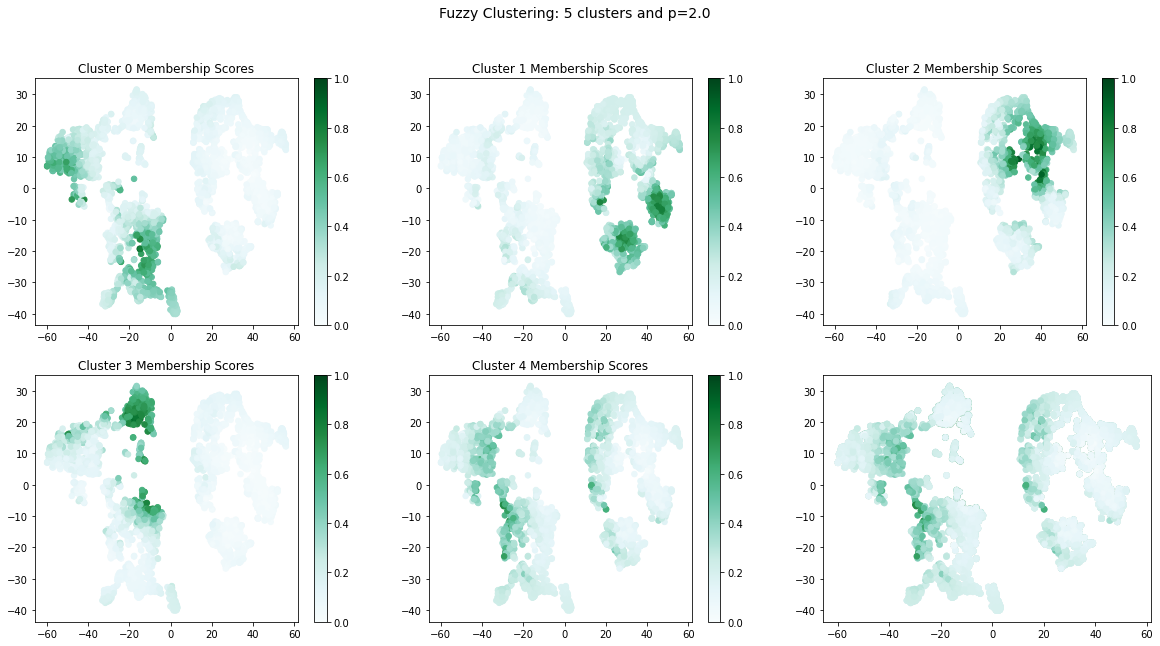

In [61]:
#Number of clusters
c= 5

#List of cluster membership score matrices for each p
W_list = []

#List of normalized dunning partitional coefficient scores for each p
ndpc_list = []

#List of cluster centroids for each p
centroids_list=[]

#Let's pick p in  [1.01, 1.208, 1.406, 1.802, 2]
for p in np.linspace(1.01, 2, 6):
    print('------------------------------------------')
    print('Analysis for c=%s and p=%s'%(c,p))

    
    #Cluster the data using these parameters
    centroids, W, _, _, obj_history, _, ndpc = cmeans(df.T, c=c, m=p, error=1e-6, maxiter=20000, seed=100)

    #Normalized Dunning Partitional Coefficient
    print('Normalized Dunning Partitional Coefficient: ', ndpc)
    print('Final Objective Function Value: ' , obj_history[len(obj_history)-1])
    
    #Update the lists
    W_list.append(W)
    ndpc_list.append(ndpc)
    centroids_list.append(centroids)
    
    #Color code t-SNE Plots
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
    for i in range(0,5):
        
        #Create a column with cluster i membership scores
        df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]

        #Plot the points, color coded by the membership score.
        points = plt.scatter(df_combo["x"], df_combo["y"],
                     c=df_combo['Cluster %s Membership Score'%str(i)],
                             s=30, cmap="BuGn",
                            vmin=0,
                            vmax=1)
        ax[int(np.floor(i/3)),int(i%3)].scatter(df_combo["x"], df_combo["y"],
                     c=df_combo['Cluster %s Membership Score'%str(i)],
                                                s=30, cmap="BuGn",
                                               vmin=0,
                                               vmax=1)

        fig.colorbar(points, ax=ax[int(np.floor(i/3)),int(i%3)])
        ax[int(np.floor(i/3)),int(i%3)].set_title('Cluster %s Membership Scores'%(str(i)))
    plt.show()
    

`As our goal is find a pair of p and c so that the clustering is able to identify the underlying clusters in the dataset, as well as find out which clusters that the "straddle nodes" should belong to. 
From above,the p = 1.208  yield the most reasonable answer, as we can see we can clearly indentify the "straddle nodes" as well as the main clusters. p = 1.01 are unable to identify the and other p's are just too fuzzy. Therefore, the parameter combination we choose for fuzzy c-mean algorithm is c = 5, p = 1.208`


### 8.2. Clustering Algorithm

#### Let's fit the algorithm as we decide to use c = 5, p = 1.208 for fuzzy c-means algorithm

In [62]:

X3 = df.copy()
c = 5
p = 1.208
centroids, W, W_0, dist_mat, history, iters, ndpc =cmeans(X3.T, c=c, m=p, error=1e-6, maxiter=20000, seed=100)

ndpc

0.8705528665973127

`The ndpc value of 0.87 showing that most of the clusters have hard assignment, but it is quite far away from 1, therefore, thare are some fuzzy clustering assignments made as well.`

### 8.3. Clustering Algorithm Results Presentation

Normalized Dunning Partitional Coefficient:  0.8705528665973127
Final Objective Function Value:  84.369807739207


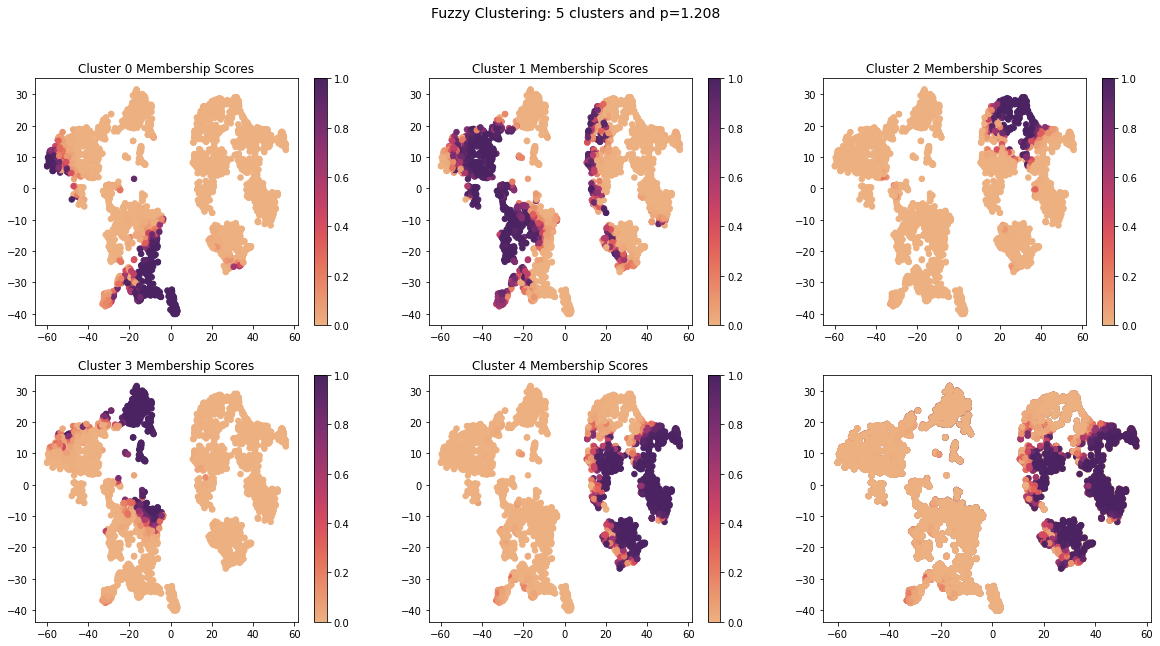

Highest Cluster Membership Scores (Sorted)
2114    0.408625
2003    0.410122
691     0.414457
1339    0.424468
907     0.426155
          ...   
2155    1.000000
62      1.000000
1483    1.000000
947     1.000000
1435    1.000000
Length: 2972, dtype: float64


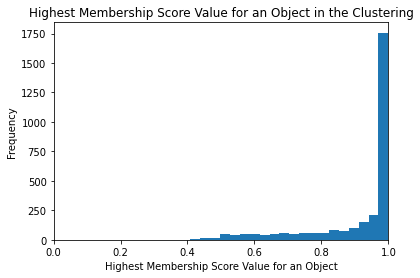

In [63]:
#Number of clusters
c=5
W_list = []

ndpc_list = []

centroids_list=[]

p = 1.208

    
#Cluster the data using these parameters
centroids, W, _, _, obj_history, _, ndpc = cmeans(X3.T, c= c, m=p, error=1e-6, maxiter=20000, seed=100)
#Normalized Dunning Partitional Coefficient
print('Normalized Dunning Partitional Coefficient: ', ndpc)
print('Final Objective Function Value: ' , obj_history[len(obj_history)-1])


W_list.append(W)
ndpc_list.append(ndpc)
centroids_list.append(centroids)

#Color code t-SNE Plots
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0,5):
    
    #Create a column with cluster i membership scores
    df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]
    #Plot the points, color coded by the membership score.
    points = plt.scatter(df_combo["x"], df_combo["y"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="flare",
                        vmin=0,
                        vmax=1)
    ax[int(np.floor(i/3)),int(i%3)].scatter(df_combo["x"], df_combo["y"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="flare",
                                           vmin=0,
                                           vmax=1)
    fig.colorbar(points, ax=ax[int(np.floor(i/3)),int(i%3)])
    ax[int(np.floor(i/3)),int(i%3)].set_title('Cluster %s Membership Scores'%(str(i)))
plt.show()


#Let's get the highest membership score for the clustering for each object in the dataset
cluster_columns=['Cluster %s Membership Score'%(str(i)) for i in range(0,5)]
df_membership=pd.DataFrame(W.T, columns=cluster_columns)
highest_membership_scores=df_membership.T.max()

print('Highest Cluster Membership Scores (Sorted)')
print(highest_membership_scores.sort_values())

if highest_membership_scores.max()>highest_membership_scores.min()+.00001:
    plt.hist(highest_membership_scores, bins=20)
    plt.title('Highest Membership Score Value for an Object in the Clustering')
    plt.xlabel('Highest Membership Score Value for an Object')
    plt.ylabel('Frequency')
    plt.xlim([0,1])
    plt.show()


### 8.4. Assessing Clustering Separation and Cohesion

In [64]:
cluster_columns=['Cluster %s Membership Score'%(str(i)) for i in range(0,5)]
df_membership=pd.DataFrame(W.T, columns=cluster_columns)
df_membership.round(4)


Cluster 0 Membership Score  Cluster 1 Membership Score  \
0                         0.0003                      0.9976   
1                         0.0000                      0.0001   
2                         0.0001                      0.9986   
3                         0.0007                      0.9983   
4                         0.0000                      0.0006   
...                          ...                         ...   
2967                      0.0000                      0.0000   
2968                      0.8385                      0.1109   
2969                      0.0020                      0.9893   
2970                      0.0000                      0.0002   
2971                      0.0001                      0.0009   

      Cluster 2 Membership Score  Cluster 3 Membership Score  \
0                         0.0007                      0.0009   
1                         0.0000                      0.0000   
2                         0.0002                      0.0003   
3                         0.0002                      0.0001   
4                         0.0775                      0.0000   
...                          ...                         ...   
2967                      0.0000                      1.0000   
2968                      0.0008                      0.0005   
2969                      0.0021                      0.0005   
2970                      0.9977                      0.0000   
2971                      0.9950                      0.0001   

      Cluster 4 Membership Score  
0                         0.0005  
1                         0.9999  
2                         0.0009  
3                         0.0007  
4                         0.9219  
...                          ...  
2967                      0.0000  
2968                      0.0492  
2969                      0.0060  
2970                      0.0020  
2971                      0.0039  

[2972 rows x 5 columns]

In [65]:
partition_cluster_labels=[df_membership.T[i].argmax() for i in range(0,len(df_membership))]
partition_cluster_labels

X3['predicted_cluster']=partition_cluster_labels
X3.head()

Vote_Data_Ben_Carson_Number_of_Votes  \
0                              0.055657   
1                              0.011700   
2                              0.000000   
3                              0.060889   
4                              0.007026   

   Vote_Data_Bernie_Sanders_Number_of_Votes  \
0                                  0.056934   
1                                  0.298455   
2                                  0.163976   
3                                  0.101037   
4                                  0.332683   

   Vote_Data_Carly_Fiorina_Number_of_Votes  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Vote_Data_Chris_Christie_Number_of_Votes  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Vote_Data_Donald_Trump_Number_of_Votes  \
0                                0.246898   
1                                0.269757   
2                                0.255544   
3                                0.306370   
4                                0.085350   

   Vote_Data_Hillary_Clinton_Number_of_Votes  \
0                                   0.273905   
1                                   0.249227   
2                                   0.280887   
3                                   0.265037   
4                                   0.375228   

   Vote_Data_Jeb_Bush_Number_of_Votes  Vote_Data_John_Kasich_Number_of_Votes  \
0                            0.043066                               0.028650   
1                            0.000000                               0.066004   
2                            0.000000                               0.019460   
3                            0.000000                               0.031111   
4                            0.000000                               0.098100   

   Vote_Data_Marco_Rubio_Number_of_Votes  \
0                               0.135036   
1                               0.058940   
2                               0.060793   
3                               0.134074   
4                               0.075202   

   Vote_Data_Martin_OMalley_Number_of_Votes  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Vote_Data_Mike_Huckabee_Number_of_Votes  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Vote_Data_Rand_Paul_Number_of_Votes  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   Vote_Data_Rick_Santorum_Number_of_Votes  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Vote_Data_Ted_Cruz_Number_of_Votes  predicted_cluster  
0                            0.159854                  1  
1                            0.045916                  4  
2                            0.219339                  1  
3                            0.101481                  1  
4                            0.026412                  4

For n_clusters = 5 The average silhouette_score is : 0.7954809164718162


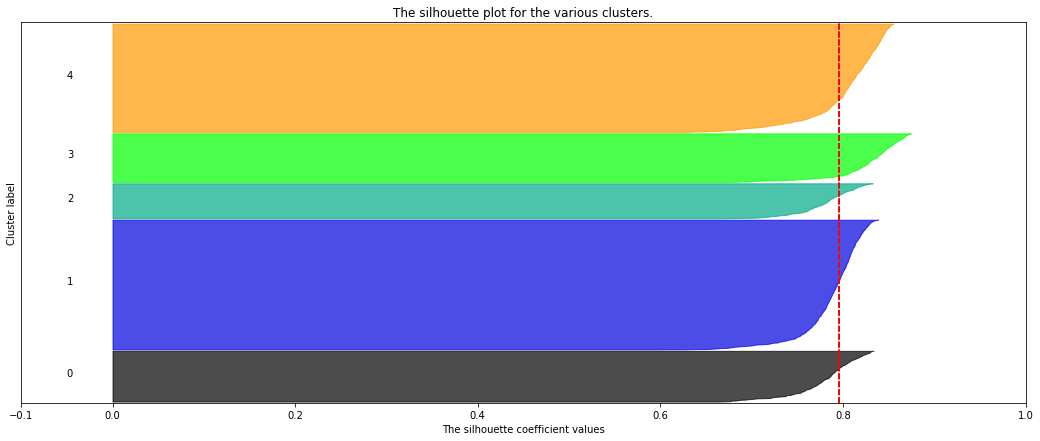

In [66]:
show_silhouette_plots(X3, np.array(partition_cluster_labels))

`Cluster 1 and 4 have about the same amount of cohesion and separation as their shapes are about the same. Cluster label 1 has to most object as it is the thickest amoung all clustering labels. 
Cluster 0, 2, 3  have about the same amount of cohesion and separation as their shapes are about the same. Also, clustering by c = 5 give us a relative high silhouette_score,  meaning the clusters are well seperated and cohesive.`


### 8.5. Additional Analysis

We will calculate the RAND score, to compare the similarity of pre-assigned lable and predicted clustering labels. 

In [67]:
adjusted_rand_score(np.array(partition_cluster_labels), df_scaled['political_preference'])

0.3290869743269361

`The adjusted RAND score of clustering labels and pre-assigned label is 0.329, showing that fuzzy c-means clustering had a relative weak association with political_preference. Since the rand score measure the similarity of partitions and c-means label yield a larger rand score when comparing to political_preference label.`

In [68]:
homogeneity_score(np.array(partition_cluster_labels), df_scaled['political_preference'])

0.31659786354851754

`homogeneity_score is 0.316, which indicates that the c-means cluster are relative heterogenous with respect to the class labels.`

In [69]:
completeness_score(np.array(partition_cluster_labels), df_scaled['political_preference'])

0.7358092848146952

`Completeness score is 0.73, a relative high score, which indicates that relatively most of political preference's label are evenly distributes amongst the clusters`

Next, we will color coding the points in the t-sne plot by cluster labels and class labels.

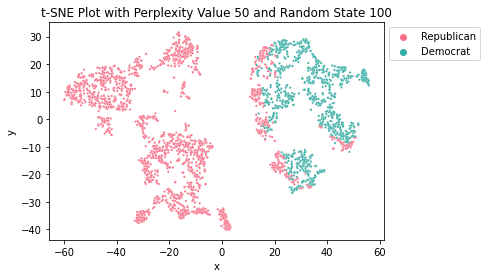

In [70]:
#By class labels
df_combo["political_preference"] = df_scaled['political_preference']
df_combo["region"] = df_scaled['region']

sns.scatterplot(x='x',y='y', hue='political_preference', palette=sns.color_palette('husl',2), s=5, data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 100))
plt.legend(bbox_to_anchor=(1,1))
plt.show()


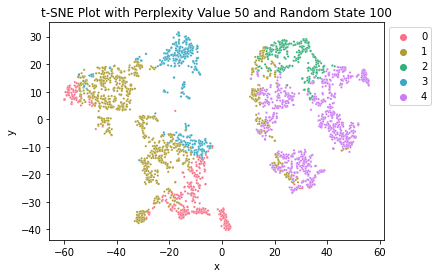

In [71]:
#By c-mean hard partition labels
df_combo['predicted_cluster2']=partition_cluster_labels

sns.scatterplot(x='x',y='y', hue='predicted_cluster2', palette=sns.color_palette('husl',5), s=5, data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(50, 100))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Conclusion:** As the plots shows, it matches with my homogeneity score, and the completeness score since each of the c-means clusters are relatively heterogenous with respect to the the class labels. As we can see the left part are repulican labels but contains multiple clustering labels. It has a better completeness score since most of political preference's label are evenly distributes amongst the clusters. 

### 8.6. Describing Each of the Clusters

We have regions as the categorical variable, so creating a side-by-side box plot. 

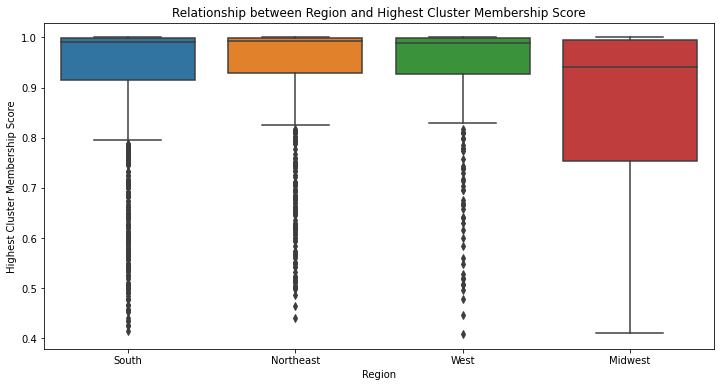

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_scaled['region'], y=highest_membership_scores, data=df_membership)
plt.title('Relationship between Region and Highest Cluster Membership Score')
plt.xlabel('Region')
plt.ylabel('Highest Cluster Membership Score')
plt.show()

`From the plot above, we can say that Midwest region has the least amount of overall certainty when it comes to being assigned to a cluster, since  The distribution of its highest cluster membership score weights is lower than many of the other region distributions in the plot above.`

### Next, create a side-by-side box plot visualization for each numerical attribute and their correponding cluster label in the dataset

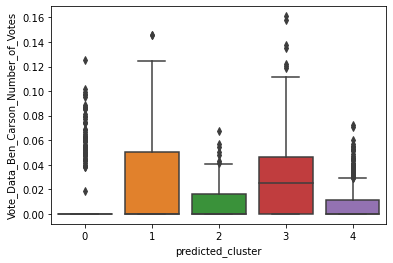

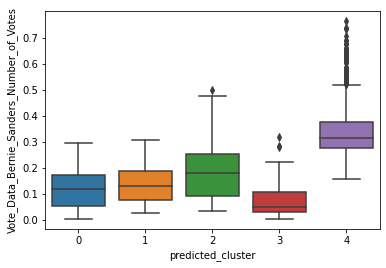

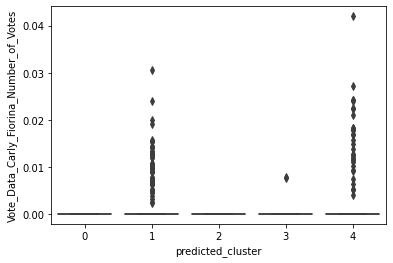

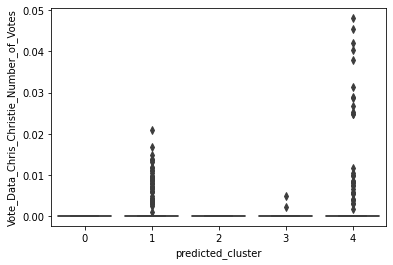

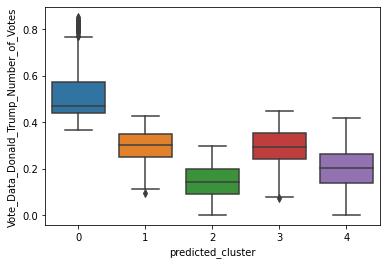

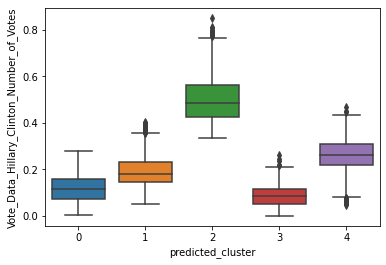

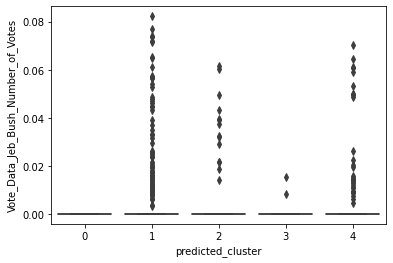

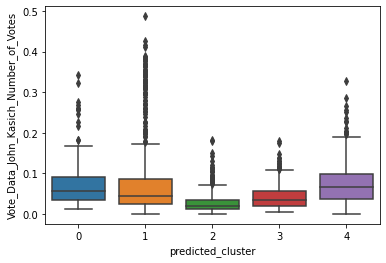

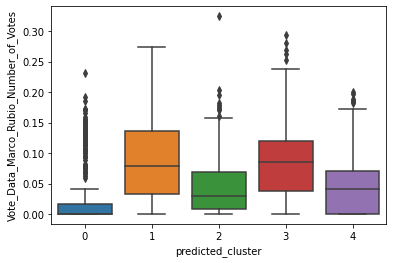

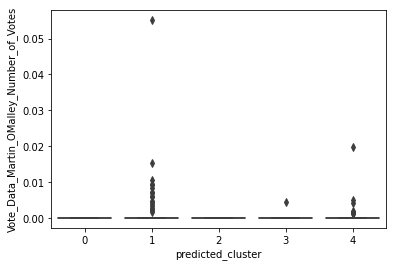

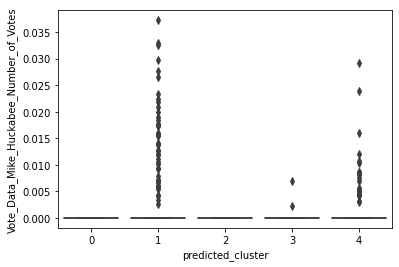

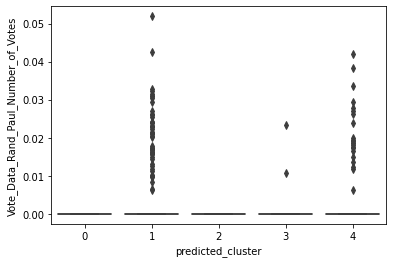

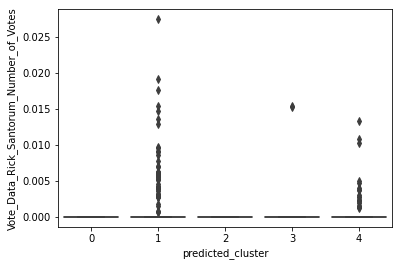

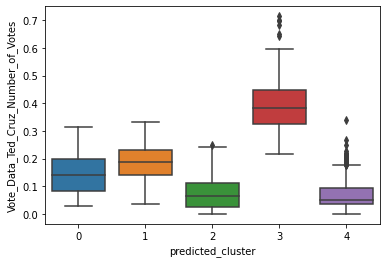

In [73]:
for col in X3.columns[0:14]:
    sns.boxplot(x="predicted_cluster", y=col, data=X3)
    plt.show()

**Conclusion:** From the box plot above, it give us a clear pattern of which candidate should belong to which clusters. 

Overall:

* Cluster 4 is comprised of candidates that:
    - have highest percent of vote for Bernie_Sanders compared to other candidates clusters
    - have lowest percent of vote for Ted_Cruz compared to other candidates clusters


* Cluster 3 is comprised of candidates that:
    - have highest percent of vote for Ted_Cruz compared to other candidates clusters
    - have lowest percent of vote for Hillary_Clinton compared to other candidates clusters
    

* Cluster 2 is comprised of candidates that:
    - have highest percent of vote for Hillary_Clinton compared to other candidates clusters
    - have lowest percent of vote for John_Kasich, and Donald_Trump compared to other candidates clusters
    
    
* Cluster 1 is comprised of candidates that:
    - Does not perfer or disperfer any candidate, all candidate in this cluster are about equally perfered
    
    
* Cluster 0 is comprised of candidates that:
    - have highest percent of vote for Donald_Trump compared to other candidates clusters
    - have lowest percent of vote for Marco_Rubio compared to other candidates clusters
    
    

## 9. Analysis Summary and Conclusion

### 9.1. Algorithm Comparison Summary

#### 9.1.1. Comparing Algorithm Performance

In previous sections, we tried both k-mean algorithm and fuzzy c-means algorithm, k-mean clustering suggested 2 clusters while fuzzy c-means suggested 5 clusters. However, since k-means hard assigned clustering by euclidance distance, based on the data provided, the 2 clustering are most likely to be republican and democrat. And we can not see any subclusters or other underlying relationship besides of these two main clusters. Therefore, it returns good rand score, homogenous score, and completeness score which are 0.59, 0.55 and 0.59 respectively. Indicating predicated clusters are homogenous, and the class label are relatively evenly distributes amongst the clusters.

On the other hand, fuzzy c-means clustering algorithm is able to identify "straddle nodes", and there does exist some objects that could belong to multiple clusters as suggested by c-means algorithm. As it seperate the main clusters into 5 smaller clusters, it does not return a better rand score(0.325), and homogenous score(0.314). But it does give a very good completeness score(0.73). So the class label are evenly distributes amongst the clusters to a great deal.

They both returns very good silhouette_score. For clustering by k = 2 give us a silhouette_score of 0.74, and  clustering by c = 5 give us silhouette_score of 0.79,  meaning the clusters in both different clustering algorithm are well seperated and cohesive.

#### 9.1.2. Comparing Algorithm Results

As our reasearch question states: To find that is there existing a clear pattern in the way counties vote for different political parties.

Recall that this dataset contains two parties and their candidates are: 

Republican = {"Ted_Cruz", "Ben Carson", "Carly Fiorina", "Chris Christie", "Donald Trump", "Jeb Bush", "John Kasich", "Marco Rubio",  "Mike Huckabee", Rand Paul, Rick Santorum }

Democrat = {"Bernie Sanders", "Hillary Clinton", "Martin O'Malley" }

The k-mean cluster has: 

1. Cluster 0 perfer more to: Ben_carson, Donald_Trump, Marco_Rubio, Ted_Cruz

2. Cluster 1 perfer more to: Bernie_Sanders, Hillary_Clinton

3. Swing Candidate: John_Kasich is perfered by both clusters. 

Therefore, the two main clusters are most probably the two parties in this dataset. The lower rand score may result from hard assigning swing candidate John_Kasich into either of Democrat party or republican party. 

The c-mean cluster has: 

* Cluster 4 is comprised of candidates that:
    - have highest percent of vote for Bernie_Sanders compared to other candidates clusters
    - have lowest percent of vote for Ted_Cruz compared to other candidates clusters


* Cluster 3 is comprised of candidates that:
    - have highest percent of vote for Ted_Cruz compared to other candidates clusters
    - have lowest percent of vote for Hillary_Clinton compared to other candidates clusters
    

* Cluster 2 is comprised of candidates that:
    - have highest percent of vote for Hillary_Clinton compared to other candidates clusters
    - have lowest percent of vote for John_Kasich, and Donald_Trump compared to other candidates clusters
    
    
* Cluster 1 is comprised of candidates that:
    - Does not perfer or disperfer any candidate, all candidate in this cluster are about equally perfered
    
    
* Cluster 0 is comprised of candidates that:
    - have highest percent of vote for Donald_Trump compared to other candidates clusters
    - have lowest percent of vote for Marco_Rubio compared to other candidates clusters


We could see that among 5 clusters, cluster 4, and 2 prefers Democrat candidates and least prefers republican candidates. cluster 3 prefers republican candidate and least prefers Democrat candidate. While cluster 0 prefers Donald trump but least prefers Marco_Rubio even though they are both Republican candidates. Therefore, This bring us more underlying relationship besides of the information gave us by just 2 main clusters as suggested by k-mean clusters. But it does not give too much information about a clear pattern in the way counties vote for different political parties as our research question stated. 

### 9.2. Conclusion and Insights Summary

To sum up, The k-mean algorithm answers the research question. And there's a clear pattern of voting for both party among all states in the US. But since the rand score, homogenous score and completeness score are not very close to 1. They are all about 0.5 as suggested by k-means. I think the problem lies in the self-created "political_perference" labels as the class label of this dataset. And I set the criteria: if a county has more than 50% vote for one party then the whole county is considered as a group of that party. The division criteria might need to be more specific. For example, some counties may have 48% of the vote for the democrat party, and 52% of vote for republican party. Then consider that a democratic county is ambiguous. Therefore, these swing counties should be considered as a main cluster instead of hard-assigning them into either the Democrat party or republican party. If I improve this part in the future research, the result of rand score, homogenous score and completeness score might get improved since they are all related to the class labels. 

## 10. Group Contribution Report

Linfeng Wang - 100% of work :)